In [2]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import ensemble
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import re
import nltk
from wordcloud import WordCloud
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import time 


### Importing of Kaggle Repository Twitter Dataset

In this Classification Task, we are trying to train a model to classify our crawled dataset whether the tweets are subjective or objective, positive or negative sentiments

In [3]:
df_tweet = pd.read_csv("Tweet.csv")

In [4]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3717964 entries, 0 to 3717963
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   tweet_id     int64 
 1   writer       object
 2   post_date    int64 
 3   body         object
 4   comment_num  int64 
 5   retweet_num  int64 
 6   like_num     int64 
dtypes: int64(5), object(2)
memory usage: 198.6+ MB


In [5]:
df_tweet.head()

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1


In [6]:
df_company_tweet = pd.read_csv("Company_Tweet.csv")

In [7]:
df_company_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4336445 entries, 0 to 4336444
Data columns (total 2 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   tweet_id       int64 
 1   ticker_symbol  object
dtypes: int64(1), object(1)
memory usage: 66.2+ MB


In [8]:
df_company_tweet.head()

,tweet_id,ticker_symbol
0,550803612197457920,AAPL
1,550803610825928706,AAPL
2,550803225113157632,AAPL
3,550802957370159104,AAPL
4,550802855129382912,AAPL


In [9]:
tweets = pd.merge(df_company_tweet,df_tweet,on= "tweet_id", how = "inner")

In [10]:
tweets.head()

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num
0,550803612197457920,AAPL,SentiQuant,1420156789,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1
1,550803612197457920,AMZN,SentiQuant,1420156789,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1
2,550803610825928706,AAPL,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1
3,550803610825928706,GOOGL,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1
4,550803610825928706,AMZN,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1


### Importing of Crawled Twitter Dataset

This is the crawled dataset from twitter with regards to stocks such as AAPL, AMZN, MSFT, TSLA, GOOGL

In [11]:
aapl_df = pd.read_csv("AAPL.csv")
amzn_df = pd.read_csv("AMZN.csv")
msft_df = pd.read_csv("MSFT.csv")
tsla_df = pd.read_csv("TSLA.csv")
googl_df = pd.read_csv("GOOGL.csv")

In [12]:
aapl_df["ticker_symbol"] = "AAPL"
amzn_df["ticker_symbol"] = "AMZN"
msft_df["ticker_symbol"] = "MSFT"
tsla_df["ticker_symbol"] = "TSLA"
googl_df["ticker_symbol"] = "GOOGL"

In [13]:
crawled_tweets = pd.concat([aapl_df, amzn_df, msft_df, tsla_df, googl_df], axis = 0)

In [14]:
crawled_tweets.reset_index(drop = True, inplace= True)


In [15]:
crawled_tweets.tail()

,date,id,user,tweet,likes,replies,retweets,ticker_symbol
7373,2023-02-28 04:39:48+00:00,1630427525334564871,ProfitsTaken,⚡️ Youtube video up and live for 2.27.2023! \n...,32,2,8,GOOGL
7374,2023-02-28 02:20:32+00:00,1630392478833451008,FIREDUpWealth,DoJ accuses Google of deleting chats in its an...,11,0,1,GOOGL
7375,2023-02-28 02:19:17+00:00,1630392162876637184,FIREDUpWealth,#Waymo to test driverless rides with employees...,14,2,1,GOOGL
7376,2023-02-28 01:56:07+00:00,1630386331087151106,data168,Not sure if anyone uses YouTube to listen to m...,39,14,0,GOOGL
7377,2023-02-28 00:53:53+00:00,1630370673175699457,tomthetrader1,Google was firmly rejected and is now approach...,30,2,5,GOOGL


In [16]:
remaining_data = pd.read_csv('remaining_data.csv')

In [17]:
remaining_data.head()

,ticker_symbol,post_date,tweet_id,writer,body,like_num,comment_num,retweet_num,tweet_activity,url_cnt,emoticons,emojis,emo_cnt,word_count,clean_text
0,APPL,2023-01-01 21:51:38+00:00,1609668699513839616,BalarezoCapital,$AAPL \n\nAAPL is in a DOWNTREND below all KMA...,9,0,3,12,1,[],{},0,16,aapl aapl downtrend kma high probabl continu l...
1,APPL,2023-01-01 21:31:03+00:00,1609663518265192448,DZierler,@Johnbenny101 I believe winning #VR #MixedReal...,6,1,3,10,0,[],{'✅': 5},5,41,johnbenny101 believ win vr mixedr ar display a...
2,APPL,2023-01-01 21:30:09+00:00,1609663291793747969,SPXTrades,Everyone is looking for $AAPL to fall into 95-...,20,2,1,23,1,[],{},0,33,everyon look aapl fall 95100 zone last bulwark...
3,APPL,2023-01-01 21:00:03+00:00,1609655716767318021,bullsonwallst,Current Berkshire Hathaway portfolio📊\n\nToo m...,11,1,3,15,1,[],{'📊': 1},1,7,current berkshir hathaway portfolioemojiplaceh...
4,APPL,2023-01-01 20:15:42+00:00,1609644555598438400,ThePupOfWallSt,#AAPL $AAPL Weekly Chart⁠\n⁠\nNotes on the cha...,14,1,5,20,1,[],{},0,9,aapl aapl weekli chart note chart courtesi tre...


In [18]:
def datasetInfo(dataset):
    print(f" Dataset Information and type \n {dataset.info()}")
    print("--------------------------------------------------------\n\n Data Types: ")
    print(dataset.dtypes)
    print("--------------------------------------------------------\n\n Rows and Columns: ")
    print(dataset.shape)
    print("--------------------------------------------------------\n\n Column Names: ")
    print(dataset.columns)
    print("--------------------------------------------------------\n\n Null Values: ")
    print(dataset.apply(lambda x: sum(x.isnull()) / len(dataset)))
    print("--------------------------------------------------------\n\n Unique Values: ")
    print(dataset.nunique())
    print("--------------------------------------------------------\n\n Describe: ")
    print(dataset.describe())

In [19]:
datasetInfo(tweets)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4336445 entries, 0 to 4336444
Data columns (total 8 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   tweet_id       int64 
 1   ticker_symbol  object
 2   writer         object
 3   post_date      int64 
 4   body           object
 5   comment_num    int64 
 6   retweet_num    int64 
 7   like_num       int64 
dtypes: int64(5), object(3)
memory usage: 297.8+ MB
 Dataset Information and type 
 None
--------------------------------------------------------

 Data Types: 
tweet_id          int64
ticker_symbol    object
writer           object
post_date         int64
body             object
comment_num       int64
retweet_num       int64
like_num          int64
dtype: object
--------------------------------------------------------

 Rows and Columns: 
(4336445, 8)
--------------------------------------------------------

 Column Names: 
Index(['tweet_id', 'ticker_symbol', 'writer', 'post_date', 'body',
       'comment_num

In [20]:
datasetInfo(remaining_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3080 entries, 0 to 3079
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ticker_symbol   3080 non-null   object
 1   post_date       3080 non-null   object
 2   tweet_id        3080 non-null   int64 
 3   writer          3080 non-null   object
 4   body            3080 non-null   object
 5   like_num        3080 non-null   int64 
 6   comment_num     3080 non-null   int64 
 7   retweet_num     3080 non-null   int64 
 8   tweet_activity  3080 non-null   int64 
 9   url_cnt         3080 non-null   int64 
 10  emoticons       3080 non-null   object
 11  emojis          3080 non-null   object
 12  emo_cnt         3080 non-null   int64 
 13  word_count      3080 non-null   int64 
 14  clean_text      3080 non-null   object
dtypes: int64(8), object(7)
memory usage: 361.1+ KB
 Dataset Information and type 
 None
--------------------------------------------------------

In [21]:
datasetInfo(crawled_tweets)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7378 entries, 0 to 7377
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           7378 non-null   object
 1   id             7378 non-null   int64 
 2   user           7378 non-null   object
 3   tweet          7378 non-null   object
 4   likes          7378 non-null   int64 
 5   replies        7378 non-null   int64 
 6   retweets       7378 non-null   int64 
 7   ticker_symbol  7378 non-null   object
dtypes: int64(4), object(4)
memory usage: 461.2+ KB
 Dataset Information and type 
 None
--------------------------------------------------------

 Data Types: 
date             object
id                int64
user             object
tweet            object
likes             int64
replies           int64
retweets          int64
ticker_symbol    object
dtype: object
--------------------------------------------------------

 Rows and Columns: 
(7378, 8)
---------

After Merging Remove the dataframes that columns are empty

In [22]:
tweets.dropna(inplace = True)

In [23]:
crawled_tweets.dropna(inplace = True)

Convert our tweet date_time into just date

In [24]:
tweets['post_date'] = pd.to_datetime(tweets["post_date"],utc = False , unit = 's',).dt.normalize()
tweets['post_date'] = tweets["post_date"].dt.date
tweets.head()

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num
0,550803612197457920,AAPL,SentiQuant,2015-01-01,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1
1,550803612197457920,AMZN,SentiQuant,2015-01-01,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1
2,550803610825928706,AAPL,SentiQuant,2015-01-01,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1
3,550803610825928706,GOOGL,SentiQuant,2015-01-01,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1
4,550803610825928706,AMZN,SentiQuant,2015-01-01,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1


In [25]:
crawled_tweets['date'] = pd.to_datetime(crawled_tweets['date'])
crawled_tweets['date'] = crawled_tweets['date'].dt.date

We need to differentiate active tweets which are more "Reputable" compared to botting tweets or spams. <br>
Activities can be defined as comments/replies, retweets, and likes.

In [26]:
tweets.sort_values(by = "comment_num" , ascending  = False, inplace = True)
tweets


,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num
3786974,1014983757252780033,TSLA,lopezlinette,2018-07-05,"I’d just like to point out that right now, rig...",631,369,0
4112626,1118989675257978880,TSLA,GerberKawasaki,2019-04-18,"If a Tesla saves you $200 a month on gas, you ...",567,0,0
4306536,1199424478536753155,TSLA,AlexSibila,2019-11-26,~Tesla feature request thread~Feel free to rep...,563,48,662
2823018,885933344487342082,AMZN,internet_dust,2017-07-14,"""I sell books."" versus ""I sell whatever the fu...",496,0,0
4182686,1138975188127834112,TSLA,TeslaNY,2019-06-13,“I think it's basically financially insane to ...,442,0,0
...,...,...,...,...,...,...,...,...
1488123,1060565704389378055,AAPL,ScottSegen,2018-11-08,Mark Zuckerberg turns down UK parliament reque...,0,0,1
1488124,1060565704389378055,GOOGL,ScottSegen,2018-11-08,Mark Zuckerberg turns down UK parliament reque...,0,0,1
1488125,1060566279818366977,AAPL,jordanladz,2018-11-08,Get audible updates with this new application....,0,0,0
1488126,1060566346763849735,AAPL,CompoundFreedom,2018-11-08,Apple Opens First Store in Thailand Saturday h...,0,0,0


In [27]:
crawled_tweets.sort_values(by = "replies" , ascending  = False, inplace = True)
crawled_tweets

,date,id,user,tweet,likes,replies,retweets,ticker_symbol
5493,2023-02-07,1623104847309594626,stevenmarkryan,What is your avg cost for $TSLA?,533,934,18,TSLA
4507,2023-01-05,1611144585966911491,farzyness,"When you own a Tesla, you never have to visit ...",4522,830,361,TSLA
5585,2023-02-10,1624190414906613761,GerberKawasaki,It’s time for retail investors to have a real ...,1193,792,81,TSLA
5682,2023-02-13,1625274047272738816,GerberKawasaki,Tesla was down today post super bowl in a very...,554,770,40,TSLA
5801,2023-02-17,1626721213895823361,WholeMarsBlog,Tesla Autopilot Hardware 3 will NEVER be able ...,3768,731,431,TSLA
...,...,...,...,...,...,...,...,...
5049,2023-01-23,1617662159806410753,HeartDocTesla,Stocks rally. Default is MSM must create a neg...,9,0,1,TSLA
6348,2023-01-15,1614662694262407168,OptionsMike,$GOOGL remains a lagger in tech. 50D almost th...,10,0,3,GOOGL
6347,2023-01-15,1614676421208866818,TogetherWeTrad3,$GOOGL https://t.co/zpvbKIrA98,15,0,2,GOOGL
1298,2023-02-16,1626296950562619392,AhmedAbouhalawa,@thejefflutz @elonmusk @skorusARK We must shor...,37,0,0,AAPL


The tweet activities will be defined by the summation of all comments/replies, likes and retweets to differentiate from bots or spams, where tweets are more "usable" for sentimental analysis

In [28]:
tweets["tweet_activity"] = tweets["comment_num"] + tweets["like_num"] + tweets["retweet_num"]
tweets

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity
3786974,1014983757252780033,TSLA,lopezlinette,2018-07-05,"I’d just like to point out that right now, rig...",631,369,0,1000
4112626,1118989675257978880,TSLA,GerberKawasaki,2019-04-18,"If a Tesla saves you $200 a month on gas, you ...",567,0,0,567
4306536,1199424478536753155,TSLA,AlexSibila,2019-11-26,~Tesla feature request thread~Feel free to rep...,563,48,662,1273
2823018,885933344487342082,AMZN,internet_dust,2017-07-14,"""I sell books."" versus ""I sell whatever the fu...",496,0,0,496
4182686,1138975188127834112,TSLA,TeslaNY,2019-06-13,“I think it's basically financially insane to ...,442,0,0,442
...,...,...,...,...,...,...,...,...,...
1488123,1060565704389378055,AAPL,ScottSegen,2018-11-08,Mark Zuckerberg turns down UK parliament reque...,0,0,1,1
1488124,1060565704389378055,GOOGL,ScottSegen,2018-11-08,Mark Zuckerberg turns down UK parliament reque...,0,0,1,1
1488125,1060566279818366977,AAPL,jordanladz,2018-11-08,Get audible updates with this new application....,0,0,0,0
1488126,1060566346763849735,AAPL,CompoundFreedom,2018-11-08,Apple Opens First Store in Thailand Saturday h...,0,0,0,0


In [29]:
crawled_tweets["tweet_activity"] = crawled_tweets["replies"] + crawled_tweets["likes"] + crawled_tweets["retweets"]
crawled_tweets

,date,id,user,tweet,likes,replies,retweets,ticker_symbol,tweet_activity
5493,2023-02-07,1623104847309594626,stevenmarkryan,What is your avg cost for $TSLA?,533,934,18,TSLA,1485
4507,2023-01-05,1611144585966911491,farzyness,"When you own a Tesla, you never have to visit ...",4522,830,361,TSLA,5713
5585,2023-02-10,1624190414906613761,GerberKawasaki,It’s time for retail investors to have a real ...,1193,792,81,TSLA,2066
5682,2023-02-13,1625274047272738816,GerberKawasaki,Tesla was down today post super bowl in a very...,554,770,40,TSLA,1364
5801,2023-02-17,1626721213895823361,WholeMarsBlog,Tesla Autopilot Hardware 3 will NEVER be able ...,3768,731,431,TSLA,4930
...,...,...,...,...,...,...,...,...,...
5049,2023-01-23,1617662159806410753,HeartDocTesla,Stocks rally. Default is MSM must create a neg...,9,0,1,TSLA,10
6348,2023-01-15,1614662694262407168,OptionsMike,$GOOGL remains a lagger in tech. 50D almost th...,10,0,3,GOOGL,13
6347,2023-01-15,1614676421208866818,TogetherWeTrad3,$GOOGL https://t.co/zpvbKIrA98,15,0,2,GOOGL,17
1298,2023-02-16,1626296950562619392,AhmedAbouhalawa,@thejefflutz @elonmusk @skorusARK We must shor...,37,0,0,AAPL,37


### Filter Tweets that are >= 50 activities

In [30]:
filterTweets = tweets.loc[tweets["tweet_activity"] > 50]

In [31]:
filterCrawledTweets = crawled_tweets.loc[crawled_tweets["tweet_activity"] > 50]

In [32]:
filterTweets.head()

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity
3786974,1014983757252780033,TSLA,lopezlinette,2018-07-05,"I’d just like to point out that right now, rig...",631,369,0,1000
4112626,1118989675257978880,TSLA,GerberKawasaki,2019-04-18,"If a Tesla saves you $200 a month on gas, you ...",567,0,0,567
4306536,1199424478536753155,TSLA,AlexSibila,2019-11-26,~Tesla feature request thread~Feel free to rep...,563,48,662,1273
2823018,885933344487342082,AMZN,internet_dust,2017-07-14,"""I sell books."" versus ""I sell whatever the fu...",496,0,0,496
4182686,1138975188127834112,TSLA,TeslaNY,2019-06-13,“I think it's basically financially insane to ...,442,0,0,442


In [33]:
filterCrawledTweets.head()

,date,id,user,tweet,likes,replies,retweets,ticker_symbol,tweet_activity
5493,2023-02-07,1623104847309594626,stevenmarkryan,What is your avg cost for $TSLA?,533,934,18,TSLA,1485
4507,2023-01-05,1611144585966911491,farzyness,"When you own a Tesla, you never have to visit ...",4522,830,361,TSLA,5713
5585,2023-02-10,1624190414906613761,GerberKawasaki,It’s time for retail investors to have a real ...,1193,792,81,TSLA,2066
5682,2023-02-13,1625274047272738816,GerberKawasaki,Tesla was down today post super bowl in a very...,554,770,40,TSLA,1364
5801,2023-02-17,1626721213895823361,WholeMarsBlog,Tesla Autopilot Hardware 3 will NEVER be able ...,3768,731,431,TSLA,4930


### Data Cleaning and Tokenization of text body

In [34]:
# Function to remove stopwords (common english stopwords from nltk)
from nltk.corpus import stopwords

def removeStopWords(df):
    finalList = []
    stop_words = set(stopwords.words('english'))
    for word in df:
        if word not in stop_words:
            finalList.append(word)
    df = finalList
    return df

In [35]:
# Function to stem tweets 
from nltk.stem.porter import *

def stem_text(text):
    
    stemmer = PorterStemmer()
   
    return [stemmer.stem(word) for word in text]

In [36]:
# Function to lemmatise tweets
def lemmatised_text(text):
    lemmatiser = nltk.stem.WordNetLemmatizer()
    return [lemmatiser.lemmatize(word) for word in text]

In [37]:
def clean_dataframe_text(df, column,lemma):
    
    # Define regex pattern to match URLs
    url_pattern = r"https?://\S+"
    
    # Remove URLs from text column
    df[column] = df[column].str.replace(url_pattern, "", regex=True)
    
    # Remove any non-alphanumeric characters and replace them with spaces
    df[column] = df[column].apply(lambda x: re.sub(r"(\w+)'d", lambda m: 'would' if m.group(1) in ['he', 'she', 'it', 'that'] else 'had', x))
    
    # Replace 's with 'is' or 'has'
    df[column] = df[column].apply(lambda x: re.sub(r"(\w+)'s", lambda m: 'is' if m.group(1) in ['he', 'she', 'it'] else 'has', x))
    
    # Remove any non-alphanumeric characters and replace them with spaces
    df[column] = df[column].apply(lambda x: re.sub(r'[^\w\s]', '', x))
    
    # Replace any consecutive whitespace characters with a single space
    df[column] = df[column].apply(lambda x: re.sub(r'\s+', ' ', x))
    
    # Remove not word characters
    df[column] = df[column].apply(lambda x: re.sub(r'[^\w\s]', ' ', x))
    
       
    # Remove digits 
    df[column] = df[column].apply(lambda x: re.sub(r'\d+', '', x))
    
    # Convert the string in lower
    df[column] = df[column].str.lower()
    
    # Tokenised the words
    df[column]  = df[column].apply(lambda x : nltk.word_tokenize(x))

    # Remove stopwords from the NLTK stopword list
    df[column] = df[column].apply(lambda x : removeStopWords(x))
    
    if lemma:
    # lemmatised the text
        df[column] = df[column].apply(lambda x : lemmatised_text(x))
    else:
    # Stemmed the text
        df[column] = df[column].apply(lambda x : stem_text(x))
    #concatenate the tokenised list into string
    df[column] = df[column].apply(lambda x: ' '.join(x))
    
      
    return df

In [38]:
# Tweets that are cleaned and lemmatised
filterTweetsLemma = filterTweets.copy()
filterTweetsLemma = clean_dataframe_text(filterTweetsLemma,"body",True)
filterTweetsLemma.head()

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity
3786974,1014983757252780033,TSLA,lopezlinette,2018-07-05,id like point right right moment elonmusk goin...,631,369,0,1000
4112626,1118989675257978880,TSLA,GerberKawasaki,2019-04-18,tesla save month gas ten year take saving put ...,567,0,0,567
4306536,1199424478536753155,TSLA,AlexSibila,2019-11-26,tesla feature request threadfeel free reply il...,563,48,662,1273
2823018,885933344487342082,AMZN,internet_dust,2017-07-14,sell book versus sell whatever fuck want amzn,496,0,0,496
4182686,1138975188127834112,TSLA,TeslaNY,2019-06-13,think basically financially insane buy anythin...,442,0,0,442


In [39]:
# Tweets that are cleaned and stemmed
filterTweets = clean_dataframe_text(filterTweets,"body",False)
filterTweets.head()

C:\Users\eric2\AppData\Local\Temp\ipykernel_43748\4015562605.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.replace(url_pattern, "", regex=True)
C:\Users\eric2\AppData\Local\Temp\ipykernel_43748\4015562605.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].apply(lambda x: re.sub(r"(\w+)'d", lambda m: 'would' if m.group(1) in ['he', 'she', 'it', 'that'] else 'had', x))
C:\Users\eric2\AppData\Local\Temp\ipykernel_43748\4015562605.py:13: SettingWithCop

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity
3786974,1014983757252780033,TSLA,lopezlinette,2018-07-05,id like point right right moment elonmusk go f...,631,369,0,1000
4112626,1118989675257978880,TSLA,GerberKawasaki,2019-04-18,tesla save month ga ten year take save put bal...,567,0,0,567
4306536,1199424478536753155,TSLA,AlexSibila,2019-11-26,tesla featur request threadfeel free repli ill...,563,48,662,1273
2823018,885933344487342082,AMZN,internet_dust,2017-07-14,sell book versu sell whatev fuck want amzn,496,0,0,496
4182686,1138975188127834112,TSLA,TeslaNY,2019-06-13,think basic financi insan buy anyth except ele...,442,0,0,442


In [40]:
filterTweets["body"].head()

3786974    id like point right right moment elonmusk go f...
4112626    tesla save month ga ten year take save put bal...
4306536    tesla featur request threadfeel free repli ill...
2823018           sell book versu sell whatev fuck want amzn
4182686    think basic financi insan buy anyth except ele...
Name: body, dtype: object

In [41]:
filterCrawledTweetsLemma = filterCrawledTweets.copy()
filterCrawledTweetsLemma = clean_dataframe_text(filterCrawledTweetsLemma, "tweet", True)
filterCrawledTweetsLemma.head()

,date,id,user,tweet,likes,replies,retweets,ticker_symbol,tweet_activity
5493,2023-02-07,1623104847309594626,stevenmarkryan,avg cost tsla,533,934,18,TSLA,1485
4507,2023-01-05,1611144585966911491,farzyness,tesla never visit gas station leave everyday f...,4522,830,361,TSLA,5713
5585,2023-02-10,1624190414906613761,GerberKawasaki,time retail investor real voice feel huge asse...,1193,792,81,TSLA,2066
5682,2023-02-13,1625274047272738816,GerberKawasaki,tesla today post super bowl strong market thou...,554,770,40,TSLA,1364
5801,2023-02-17,1626721213895823361,WholeMarsBlog,tesla autopilot hardware never able drive arou...,3768,731,431,TSLA,4930


In [42]:
filterCrawledTweets= clean_dataframe_text(filterCrawledTweets, "tweet", False)
filterCrawledTweets.head()

C:\Users\eric2\AppData\Local\Temp\ipykernel_43748\4015562605.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.replace(url_pattern, "", regex=True)
C:\Users\eric2\AppData\Local\Temp\ipykernel_43748\4015562605.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].apply(lambda x: re.sub(r"(\w+)'d", lambda m: 'would' if m.group(1) in ['he', 'she', 'it', 'that'] else 'had', x))
C:\Users\eric2\AppData\Local\Temp\ipykernel_43748\4015562605.py:13: SettingWithCop

,date,id,user,tweet,likes,replies,retweets,ticker_symbol,tweet_activity
5493,2023-02-07,1623104847309594626,stevenmarkryan,avg cost tsla,533,934,18,TSLA,1485
4507,2023-01-05,1611144585966911491,farzyness,tesla never visit ga station leav everyday ful...,4522,830,361,TSLA,5713
5585,2023-02-10,1624190414906613761,GerberKawasaki,time retail investor real voic feel huge asset...,1193,792,81,TSLA,2066
5682,2023-02-13,1625274047272738816,GerberKawasaki,tesla today post super bowl strong market thou...,554,770,40,TSLA,1364
5801,2023-02-17,1626721213895823361,WholeMarsBlog,tesla autopilot hardwar never abl drive around...,3768,731,431,TSLA,4930


### Tweet EDA

In [43]:
filterTweets["writer"].describe()


count           41625
unique           2797
top       TESLAcharts
freq             2212
Name: writer, dtype: object

In [44]:
filterCrawledTweets["user"].describe()

count             2137
unique             648
top       StockMKTNewz
freq               109
Name: user, dtype: object

### Writer Data Exploration

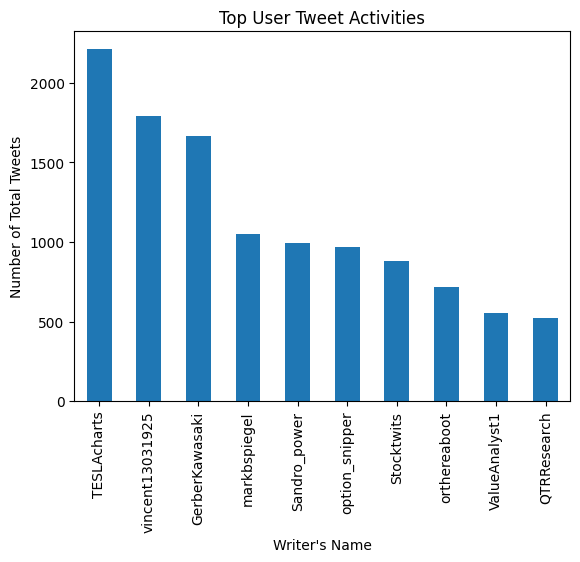

In [45]:

counts = filterTweets["writer"].value_counts(ascending= False)
countsFilter = counts[:10]
countsFilter.plot(kind="bar")

plt.title("Top User Tweet Activities")
plt.ylabel("Number of Total Tweets")
plt.xlabel("Writer's Name")
plt.show()

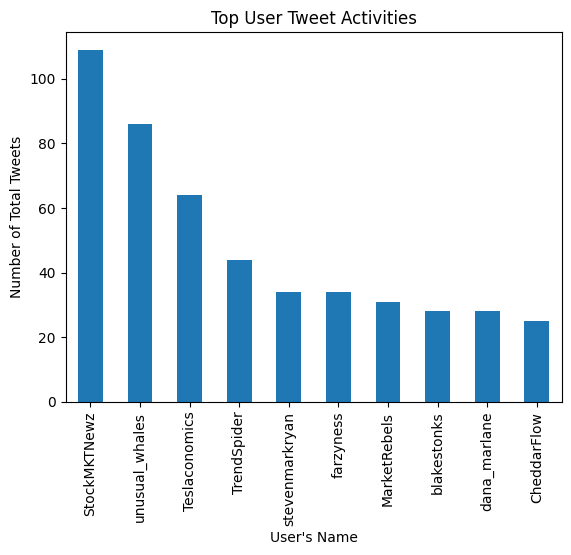

In [46]:
counts = filterCrawledTweets["user"].value_counts(ascending= False)
countsFilter = counts[:10]
countsFilter.plot(kind="bar")

plt.title("Top User Tweet Activities")
plt.ylabel("Number of Total Tweets")
plt.xlabel("User's Name")
plt.show()

Graph above shows active users/writers

<AxesSubplot: ylabel='ticker_symbol'>

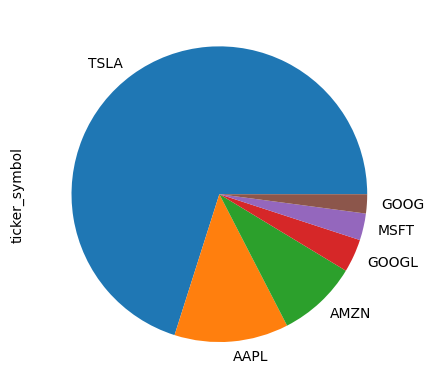

In [47]:
counts = filterTweets["ticker_symbol"].value_counts()
counts.plot(kind="pie")

<AxesSubplot: ylabel='ticker_symbol'>

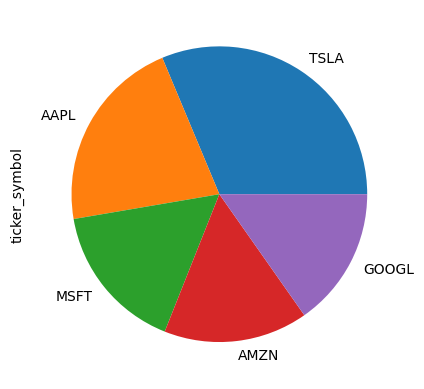

In [48]:
counts = filterCrawledTweets["ticker_symbol"].value_counts()
counts.plot(kind="pie")

Notice that there are more TSLA tweets in the dataset.

### Active Tweets dates

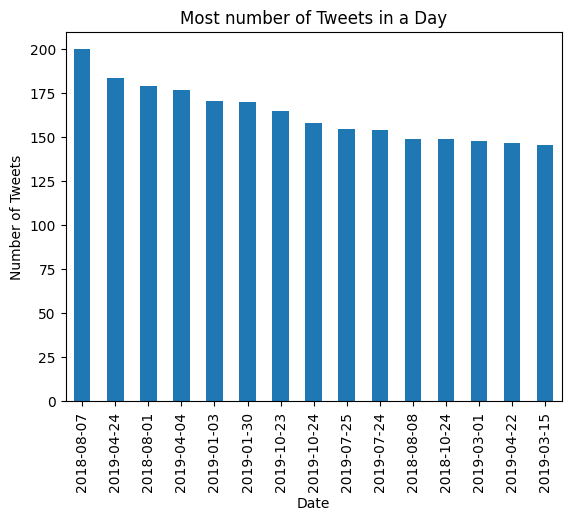

In [49]:
count = filterTweets["post_date"].value_counts(ascending = False)
count
filterCounts = count[:15]
filterCounts.plot(kind = "bar")
plt.title("Most number of Tweets in a Day")
plt.ylabel("Number of Tweets")
plt.xlabel("Date")
plt.show()

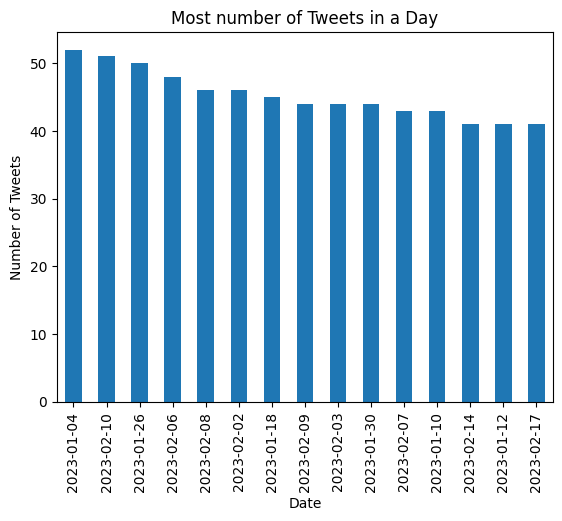

In [50]:
count = filterCrawledTweets["date"].value_counts(ascending = False)
count
filterCounts = count[:15]
filterCounts.plot(kind = "bar")
plt.title("Most number of Tweets in a Day")
plt.ylabel("Number of Tweets")
plt.xlabel("Date")
plt.show()

Above bar graphs shows the highest tweets in the respective days

### Word Cloud of Tweets

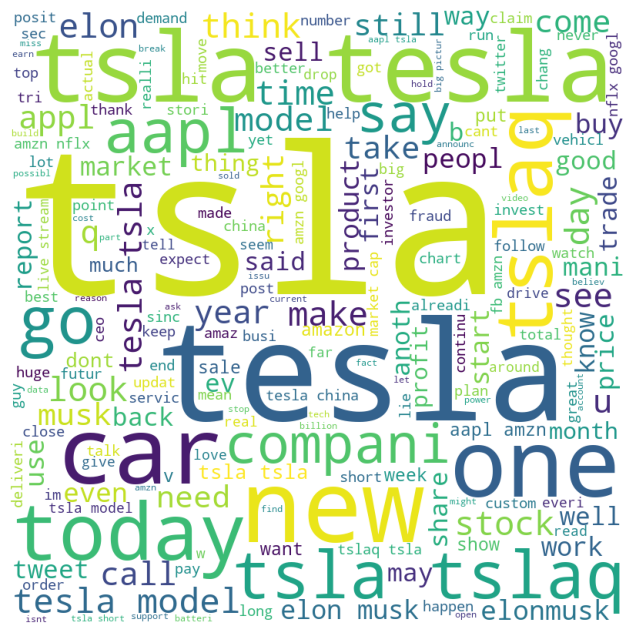

In [51]:
text = " ".join(filterTweets["body"])
wordcloud = WordCloud(width = 800, height = 800, background_color='white', max_words = 200)
wordcloud.generate(text)

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

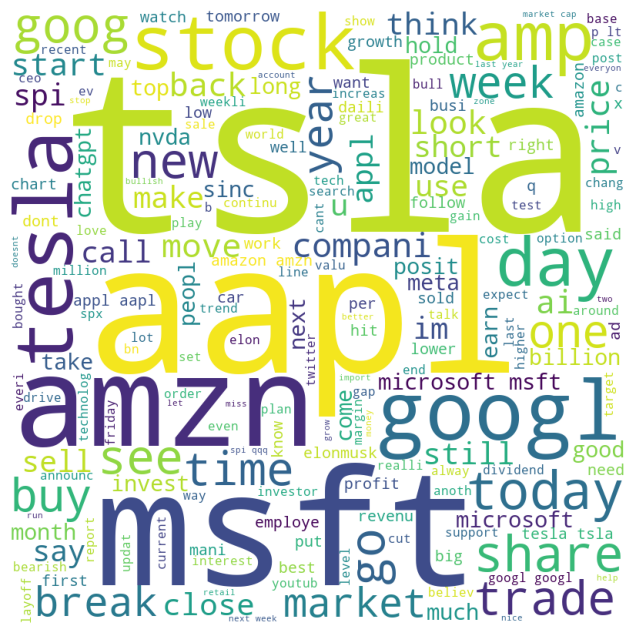

In [52]:
text = " ".join(filterCrawledTweets["tweet"])
wordcloud = WordCloud(width = 800, height = 800, background_color='white', max_words = 200)
wordcloud.generate(text)

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

From the word cloud we can tell that tsla aapl msft are common tweets in Twitter

# Polarity Detection

### Subjectivity and Polarity Analysis using Textblob

In [53]:
from textblob import TextBlob

In [54]:
# Function to use TextBlob (Sentimental Analysis [Objectivity & Polarity])

def add_sentiment_scores_blob(df, text_column, polarity_threshold = 0.0 , subjectivity_threshold = 0.5):
    # Compute polarity and subjectivity scores for each row in the specified text column
    scores = df[text_column].apply(lambda x: TextBlob(x).sentiment)
    
    # Add two new columns to the DataFrame for the polarity and subjectivity scores
    df['blob_polarity'] = scores.apply(lambda x: x.polarity)
    df['blob_subjectivity'] = scores.apply(lambda x: x.subjectivity)
    
    # Convert polarity score to class (positive, neutral, or negative) based on the specified threshold
    df['blob_polarity'] = df['blob_polarity'].apply(lambda x: 'Positive' if x > polarity_threshold else 'Negative' if x < -polarity_threshold else 'Neutral')
    
    # Convert subjectivity score to class (subjective or objective) based on the specified threshold
    df['blob_subjectivity'] = df['blob_subjectivity'].apply(lambda x: 'Subjective' if x > subjectivity_threshold else 'Objective')
    
    return df
    
    

In [55]:
add_sentiment_scores_blob(filterTweets,"body", 0.0, 0.5)
filterTweets.head()

C:\Users\eric2\AppData\Local\Temp\ipykernel_43748\2951990553.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['blob_polarity'] = scores.apply(lambda x: x.polarity)
C:\Users\eric2\AppData\Local\Temp\ipykernel_43748\2951990553.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['blob_subjectivity'] = scores.apply(lambda x: x.subjectivity)
C:\Users\eric2\AppData\Local\Temp\ipykernel_43748\2951990553.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity,blob_polarity,blob_subjectivity
3786974,1014983757252780033,TSLA,lopezlinette,2018-07-05,id like point right right moment elonmusk go f...,631,369,0,1000,Positive,Subjective
4112626,1118989675257978880,TSLA,GerberKawasaki,2019-04-18,tesla save month ga ten year take save put bal...,567,0,0,567,Positive,Objective
4306536,1199424478536753155,TSLA,AlexSibila,2019-11-26,tesla featur request threadfeel free repli ill...,563,48,662,1273,Negative,Subjective
2823018,885933344487342082,AMZN,internet_dust,2017-07-14,sell book versu sell whatev fuck want amzn,496,0,0,496,Negative,Subjective
4182686,1138975188127834112,TSLA,TeslaNY,2019-06-13,think basic financi insan buy anyth except ele...,442,0,0,442,Negative,Objective


In [56]:
add_sentiment_scores_blob(filterTweetsLemma,"body", 0.0, 0.5)
filterTweetsLemma.head()

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity,blob_polarity,blob_subjectivity
3786974,1014983757252780033,TSLA,lopezlinette,2018-07-05,id like point right right moment elonmusk goin...,631,369,0,1000,Positive,Subjective
4112626,1118989675257978880,TSLA,GerberKawasaki,2019-04-18,tesla save month gas ten year take saving put ...,567,0,0,567,Positive,Objective
4306536,1199424478536753155,TSLA,AlexSibila,2019-11-26,tesla feature request threadfeel free reply il...,563,48,662,1273,Negative,Subjective
2823018,885933344487342082,AMZN,internet_dust,2017-07-14,sell book versus sell whatever fuck want amzn,496,0,0,496,Negative,Subjective
4182686,1138975188127834112,TSLA,TeslaNY,2019-06-13,think basically financially insane buy anythin...,442,0,0,442,Negative,Subjective


In [57]:
add_sentiment_scores_blob(filterCrawledTweetsLemma,"tweet", 0.0, 0.5)
filterCrawledTweetsLemma.head()

,date,id,user,tweet,likes,replies,retweets,ticker_symbol,tweet_activity,blob_polarity,blob_subjectivity
5493,2023-02-07,1623104847309594626,stevenmarkryan,avg cost tsla,533,934,18,TSLA,1485,Neutral,Objective
4507,2023-01-05,1611144585966911491,farzyness,tesla never visit gas station leave everyday f...,4522,830,361,TSLA,5713,Positive,Subjective
5585,2023-02-10,1624190414906613761,GerberKawasaki,time retail investor real voice feel huge asse...,1193,792,81,TSLA,2066,Positive,Objective
5682,2023-02-13,1625274047272738816,GerberKawasaki,tesla today post super bowl strong market thou...,554,770,40,TSLA,1364,Positive,Subjective
5801,2023-02-17,1626721213895823361,WholeMarsBlog,tesla autopilot hardware never able drive arou...,3768,731,431,TSLA,4930,Negative,Objective


In [58]:
add_sentiment_scores_blob(filterCrawledTweets,"tweet", 0.0, 0.5)
filterCrawledTweets.head()

C:\Users\eric2\AppData\Local\Temp\ipykernel_43748\2951990553.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['blob_polarity'] = scores.apply(lambda x: x.polarity)
C:\Users\eric2\AppData\Local\Temp\ipykernel_43748\2951990553.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['blob_subjectivity'] = scores.apply(lambda x: x.subjectivity)
C:\Users\eric2\AppData\Local\Temp\ipykernel_43748\2951990553.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

,date,id,user,tweet,likes,replies,retweets,ticker_symbol,tweet_activity,blob_polarity,blob_subjectivity
5493,2023-02-07,1623104847309594626,stevenmarkryan,avg cost tsla,533,934,18,TSLA,1485,Neutral,Objective
4507,2023-01-05,1611144585966911491,farzyness,tesla never visit ga station leav everyday ful...,4522,830,361,TSLA,5713,Positive,Subjective
5585,2023-02-10,1624190414906613761,GerberKawasaki,time retail investor real voic feel huge asset...,1193,792,81,TSLA,2066,Positive,Objective
5682,2023-02-13,1625274047272738816,GerberKawasaki,tesla today post super bowl strong market thou...,554,770,40,TSLA,1364,Positive,Subjective
5801,2023-02-17,1626721213895823361,WholeMarsBlog,tesla autopilot hardwar never abl drive around...,3768,731,431,TSLA,4930,Neutral,Objective


### Convert Positive, Negative and Neutral to numeral labels and Subjectivity

In [59]:
sentiment_map = ["Negative", "Neutral","Positive"]
subjectivity_mapping = {"Subjective": 1, "Objective": 0}


In [60]:


filterTweets["blob_subjectivity"].replace(subjectivity_mapping, inplace = True)
filterTweets = pd.get_dummies(filterTweets, columns = ["blob_polarity"])
filterTweets.head()

C:\Users\eric2\AppData\Local\Temp\ipykernel_43748\707693292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filterTweets["blob_subjectivity"].replace(subjectivity_mapping, inplace = True)


,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity,blob_subjectivity,blob_polarity_Negative,blob_polarity_Neutral,blob_polarity_Positive
3786974,1014983757252780033,TSLA,lopezlinette,2018-07-05,id like point right right moment elonmusk go f...,631,369,0,1000,1,0,0,1
4112626,1118989675257978880,TSLA,GerberKawasaki,2019-04-18,tesla save month ga ten year take save put bal...,567,0,0,567,0,0,0,1
4306536,1199424478536753155,TSLA,AlexSibila,2019-11-26,tesla featur request threadfeel free repli ill...,563,48,662,1273,1,1,0,0
2823018,885933344487342082,AMZN,internet_dust,2017-07-14,sell book versu sell whatev fuck want amzn,496,0,0,496,1,1,0,0
4182686,1138975188127834112,TSLA,TeslaNY,2019-06-13,think basic financi insan buy anyth except ele...,442,0,0,442,0,1,0,0


In [61]:

filterTweetsLemma = pd.get_dummies(filterTweetsLemma , columns = ["blob_polarity"])
filterTweetsLemma["blob_subjectivity"].replace(subjectivity_mapping, inplace = True)
filterTweetsLemma.head()

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,tweet_activity,blob_subjectivity,blob_polarity_Negative,blob_polarity_Neutral,blob_polarity_Positive
3786974,1014983757252780033,TSLA,lopezlinette,2018-07-05,id like point right right moment elonmusk goin...,631,369,0,1000,1,0,0,1
4112626,1118989675257978880,TSLA,GerberKawasaki,2019-04-18,tesla save month gas ten year take saving put ...,567,0,0,567,0,0,0,1
4306536,1199424478536753155,TSLA,AlexSibila,2019-11-26,tesla feature request threadfeel free reply il...,563,48,662,1273,1,1,0,0
2823018,885933344487342082,AMZN,internet_dust,2017-07-14,sell book versus sell whatever fuck want amzn,496,0,0,496,1,1,0,0
4182686,1138975188127834112,TSLA,TeslaNY,2019-06-13,think basically financially insane buy anythin...,442,0,0,442,1,1,0,0


In [62]:

filterCrawledTweetsLemma = pd.get_dummies(filterCrawledTweetsLemma, columns = ["blob_polarity"])
filterCrawledTweetsLemma["blob_subjectivity"].replace(subjectivity_mapping, inplace = True)
filterCrawledTweetsLemma.head()

,date,id,user,tweet,likes,replies,retweets,ticker_symbol,tweet_activity,blob_subjectivity,blob_polarity_Negative,blob_polarity_Neutral,blob_polarity_Positive
5493,2023-02-07,1623104847309594626,stevenmarkryan,avg cost tsla,533,934,18,TSLA,1485,0,0,1,0
4507,2023-01-05,1611144585966911491,farzyness,tesla never visit gas station leave everyday f...,4522,830,361,TSLA,5713,1,0,0,1
5585,2023-02-10,1624190414906613761,GerberKawasaki,time retail investor real voice feel huge asse...,1193,792,81,TSLA,2066,0,0,0,1
5682,2023-02-13,1625274047272738816,GerberKawasaki,tesla today post super bowl strong market thou...,554,770,40,TSLA,1364,1,0,0,1
5801,2023-02-17,1626721213895823361,WholeMarsBlog,tesla autopilot hardware never able drive arou...,3768,731,431,TSLA,4930,0,1,0,0


In [63]:

filterCrawledTweets = pd.get_dummies(filterCrawledTweets, columns = ["blob_polarity"])
filterCrawledTweets["blob_subjectivity"].replace(subjectivity_mapping, inplace = True)
filterCrawledTweets.head()

,date,id,user,tweet,likes,replies,retweets,ticker_symbol,tweet_activity,blob_subjectivity,blob_polarity_Negative,blob_polarity_Neutral,blob_polarity_Positive
5493,2023-02-07,1623104847309594626,stevenmarkryan,avg cost tsla,533,934,18,TSLA,1485,0,0,1,0
4507,2023-01-05,1611144585966911491,farzyness,tesla never visit ga station leav everyday ful...,4522,830,361,TSLA,5713,1,0,0,1
5585,2023-02-10,1624190414906613761,GerberKawasaki,time retail investor real voic feel huge asset...,1193,792,81,TSLA,2066,0,0,0,1
5682,2023-02-13,1625274047272738816,GerberKawasaki,tesla today post super bowl strong market thou...,554,770,40,TSLA,1364,1,0,0,1
5801,2023-02-17,1626721213895823361,WholeMarsBlog,tesla autopilot hardwar never abl drive around...,3768,731,431,TSLA,4930,0,0,1,0


### Splitting up data for Prediction using ensemble machine learning models For Blob Subjectivity and Polarity Analysis

In [64]:
X = filterTweets["body"].values 
y = filterTweets[["blob_polarity_Negative", "blob_polarity_Neutral", "blob_polarity_Positive"]].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=0)

In [65]:
X_lemma = filterTweetsLemma["body"].values 
y_lemma = filterTweetsLemma[["blob_polarity_Negative", "blob_polarity_Neutral", "blob_polarity_Positive"]].values
X_train_lemma, X_test_lemma, y_train_lemma, y_test_lemma = train_test_split(
    X_lemma, y_lemma, test_size=0.20, random_state=0)

In [66]:
X_subj = filterTweets["body"].values 
y_subj = filterTweets["blob_subjectivity"].values
X_train_subj, X_test_subj, y_train_subj, y_test_subj = train_test_split(
    X_subj, y_subj, test_size=0.20, random_state=0)

In [67]:
X_subj_lemma = filterTweetsLemma["body"].values 
y_subj_lemma = filterTweetsLemma["blob_subjectivity"].values
X_train_subj_lemma, X_test_subj_lemma, y_train_subj_lemma, y_test_subj_lemma = train_test_split(
    X_subj_lemma, y_subj_lemma, test_size=0.20, random_state=0)

In [68]:
filterTweets["blob_subjectivity"].value_counts()

0    31642
1     9983
Name: blob_subjectivity, dtype: int64

In [69]:
filterTweets[["blob_polarity_Negative", "blob_polarity_Neutral", "blob_polarity_Positive"]].value_counts()

blob_polarity_Negative  blob_polarity_Neutral  blob_polarity_Positive
0                       1                      0                         18734
                        0                      1                         15863
1                       0                      0                          7028
dtype: int64

In [70]:
def metric_report(y_test,y_pred,time,no_record_x_test):
    accuracy = accuracy_score(y_test,y_pred)
    fmeasure = f1_score(y_test,y_pred, average = "weighted", zero_division = 1)
    recall = recall_score(y_test, y_pred, average = "weighted",zero_division = 1)
    precision = precision_score(y_test, y_pred, average = "weighted",zero_division = 1)
    print(f"The accuracy of the Model is {accuracy}")
    print(f"The F-Score of the Model is {fmeasure}")
    print(f"The Recall of the Model is {recall}")
    print(f"The precision of the Model is {precision}")
    print(f"The time taken for the Model prediction is {time} seconds")
    print(f"The number of records per second is {no_record_x_test//time}")

### Vectorise and TFIDF train and test datas

In [71]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [72]:
# Create Count Vectorizer (TF)
vectoriser = CountVectorizer()

# For blob analysis dataset that have been stemmed

X_train_vec = vectoriser.fit_transform(X_train)
X_test_vec = vectoriser.transform(X_test)


# For blob analysis dataset that have been lemmatised
X_train_lemma_vec = vectoriser.fit_transform(X_train_lemma)
X_test_lemma_vec = vectoriser.transform(X_test_lemma)


# For Subjectivity Blob Analysis Vectorised
X_train_subj_vec = vectoriser.fit_transform(X_train_subj)
X_test_subj_vec = vectoriser.transform(X_test_subj)

X_train_subj_lemma_vec = vectoriser.fit_transform(X_train_subj_lemma)
X_test_subj_lemma_vec = vectoriser.transform(X_test_subj_lemma)


# Create TFID Vectorizer 
vectoriser_tfidf = TfidfVectorizer()
# For blob analysis dataset that have been stemmed


X_train_tfidf = vectoriser_tfidf.fit_transform(X_train)
X_test_tfidf = vectoriser_tfidf.transform(X_test)


# For blob analysis dataset  that have been lemmatised


X_train_lemma_tfidf = vectoriser_tfidf.fit_transform(X_train_lemma)
X_test_lemma_tfidf = vectoriser_tfidf.transform(X_test_lemma)



# For Subjectivity Blob Analysis TFIDF
X_train_subj_tfidf = vectoriser_tfidf.fit_transform(X_train_subj)
X_test_subj_tfidf = vectoriser_tfidf.transform(X_test_subj)


X_train_subj_lemma_tfidf = vectoriser_tfidf.fit_transform(X_train_subj_lemma)
X_test_subj_lemma_tfidf = vectoriser_tfidf.transform(X_test_subj_lemma)





## Doing up Machine Learning Models for TextBlob Analysis

## Subjectivity Prediction

In [217]:
from sklearn.linear_model import LogisticRegression

In [230]:
def lr_clf(X_train, y_train, X_test, y_test):
    # Train the model using Naive Bayes algorithm
    clf = LogisticRegression(max_iter = 1000)
    test_size = len(y_test)
    clf.fit(X_train, y_train)
    # Make predictions on test data
    start_time = time.time()
    y_pred = clf.predict(X_test)
    end_time = time.time()
    time_taken =  end_time - start_time
    
    
    # Rounding off time to the nearest 0.00001s to avoid values to 0.
    if time_taken <= 0.00001:
        time_taken = 0.00001
    # Evaluate the model using accuracy score
    metric_report(y_test,y_pred,time_taken,test_size)
    

In [231]:
# Decision Tree Classifier (subjectivity) for Stemmed Dataset and vectorised
lr_clf(X_train_subj_vec,y_train_subj,X_test_subj_vec,y_test_subj)

The accuracy of the Model is 0.9506306306306306
The F-Score of the Model is 0.9500622829624981
The Recall of the Model is 0.9506306306306306
The precision of the Model is 0.9501190568705734
The time taken for the Model prediction is 1e-05 seconds
The number of records per second is 832499999.0


In [225]:
# Decision Tree Classifier (subjectivity) for lemmatised Dataset and vectorised
lr_clf(X_train_subj_lemma_vec,y_train_subj_lemma,X_test_subj_lemma_vec,y_test_subj_lemma)

The accuracy of the Model is 0.910990990990991
The F-Score of the Model is 0.9093789560724419
The Recall of the Model is 0.910990990990991
The precision of the Model is 0.9111247823537116
The time taken for the Model prediction is 0.000993490219116211 seconds
The number of records per second is 8379549.0


In [226]:
# Decision Tree Classifier (subjectivity) for stemmed Dataset and tfidf
lr_clf(X_train_subj_tfidf,y_train_subj,X_test_subj_tfidf,y_test_subj)

The accuracy of the Model is 0.9016216216216216
The F-Score of the Model is 0.8956888758976792
The Recall of the Model is 0.9016216216216216
The precision of the Model is 0.9024881262853588
The time taken for the Model prediction is 0.0009984970092773438 seconds
The number of records per second is 8337531.0


In [227]:
# Decision Tree Classifier (subjectivity) for lemmatised Dataset and tfidf
lr_clf(X_train_subj_lemma_tfidf,y_train_subj_lemma,X_test_subj_lemma_tfidf,y_test_subj_lemma)

The accuracy of the Model is 0.8691891891891892
The F-Score of the Model is 0.8625334246185911
The Recall of the Model is 0.8691891891891892
The precision of the Model is 0.8750700690879635
The time taken for the Model prediction is 0.0009970664978027344 seconds
The number of records per second is 8349493.0


### Naive Bayes ML Model

#### Create TFIDF and CountVectorisers Stemmed and Lemmatised dataset

In [73]:
def multi_nb_clf(X_train, y_train, X_test, y_test):
    # Train the model using Naive Bayes algorithm
    clf = MultinomialNB()
    test_size = len(y_test)
    clf.fit(X_train, y_train)
    # Make predictions on test data
    start_time = time.time()
    y_pred = clf.predict(X_test)
    end_time = time.time()
    time_taken =  end_time - start_time
    
    # Rounding off time to the nearest 0.00001s to avoid values to 0.
    if time_taken <= 0.00001:
        time_taken = 0.00001
    # Evaluate the model using accuracy score
    metric_report(y_test,y_pred,time_taken,test_size)
    

In [74]:
# Naive Bayes for Stemmed Dataset and Vectorised
multi_nb_clf(X_train_subj_vec,y_train_subj,X_test_subj_vec,y_test_subj)

The accuracy of the Model is 0.8518918918918919
The F-Score of the Model is 0.8412630029127331
The Recall of the Model is 0.8518918918918919
The precision of the Model is 0.8457139027245715
The time taken for the Model prediction is 0.0019953250885009766 seconds
The number of records per second is 4172252.0


In [75]:
# Naive Bayes for Lemmatised and Vectorised
multi_nb_clf(X_train_subj_lemma_vec,y_train_subj_lemma,X_test_subj_lemma_vec,y_test_subj_lemma)

The accuracy of the Model is 0.8126126126126126
The F-Score of the Model is 0.8098956979765872
The Recall of the Model is 0.8126126126126126
The precision of the Model is 0.8090731346720789
The time taken for the Model prediction is 0.0009989738464355469 seconds
The number of records per second is 8333551.0


In [78]:
# Naive Bayes for stemmed crawled dataset and TFIDF
multi_nb_clf(X_train_subj_tfidf,y_train_subj,X_test_subj_tfidf,y_test_subj)

The accuracy of the Model is 0.7656456456456456
The F-Score of the Model is 0.671349849508522
The Recall of the Model is 0.7656456456456456
The precision of the Model is 0.8135144482031966
The time taken for the Model prediction is 0.0009975433349609375 seconds
The number of records per second is 8345502.0


In [79]:
# Naive Bayes for lemmatised crawled dataset and TFIDF
multi_nb_clf(X_train_subj_lemma_tfidf,y_train_subj_lemma,X_test_subj_lemma_tfidf,y_test_subj_lemma)

The accuracy of the Model is 0.7141141141141141
The F-Score of the Model is 0.6292812900998195
The Recall of the Model is 0.7141141141141141
The precision of the Model is 0.7860819997273931
The time taken for the Model prediction is 0.0009970664978027344 seconds
The number of records per second is 8349493.0


### Create Decision Tree ML Model

#### Create TFIDF and CountVectorisers Stemmed and Lemmatised dataset

In [82]:
def dt_clf(X_train, y_train, X_test,y_test):
    clf = DecisionTreeClassifier()
    clf.fit(X_train,y_train)
    start_time = time.time()
    y_pred = clf.predict(X_test)
    end_time = time.time()
    time_taken =  end_time - start_time
    # Rounding off time to the nearest 0.00001s to avoid values to 0.
    if time_taken <= 0.00001:
        time_taken = 0.00001
    
    metric_report(y_test,y_pred,time_taken,len(y_test))

In [83]:
# Decision Tree Classifier (subjectivity) for Stemmed Dataset and vectorised
dt_clf(X_train_subj_vec,y_train_subj,X_test_subj_vec,y_test_subj)

The accuracy of the Model is 0.9273273273273274
The F-Score of the Model is 0.9281696551553492
The Recall of the Model is 0.9273273273273274
The precision of the Model is 0.9297074177571132
The time taken for the Model prediction is 0.0031325817108154297 seconds
The number of records per second is 2657552.0


In [84]:
# Decision Tree Classifier (subjectivity) for lemmatised Dataset and vectorised
dt_clf(X_train_subj_lemma_vec,y_train_subj_lemma,X_test_subj_lemma_vec,y_test_subj_lemma)

The accuracy of the Model is 0.8665465465465465
The F-Score of the Model is 0.8678649432243342
The Recall of the Model is 0.8665465465465465
The precision of the Model is 0.8705702177604783
The time taken for the Model prediction is 0.00797891616821289 seconds
The number of records per second is 1043374.0


In [87]:
# Decision Tree Classifier (subjectivity) for stemmed Dataset and tfidf
dt_clf(X_train_subj_tfidf,y_train_subj,X_test_subj_tfidf,y_test_subj)

The accuracy of the Model is 0.9187987987987988
The F-Score of the Model is 0.9198069288242349
The Recall of the Model is 0.9187987987987988
The precision of the Model is 0.9216049055414793
The time taken for the Model prediction is 0.004410743713378906 seconds
The number of records per second is 1887436.0


In [88]:
# Decision Tree Classifier (subjectivity) for lemmatised Dataset and tfidf
dt_clf(X_train_subj_lemma_tfidf,y_train_subj_lemma,X_test_subj_lemma_tfidf,y_test_subj_lemma)

The accuracy of the Model is 0.858978978978979
The F-Score of the Model is 0.8602343423816019
The Recall of the Model is 0.858978978978979
The precision of the Model is 0.8625813379027862
The time taken for the Model prediction is 0.009972810745239258 seconds
The number of records per second is 834769.0


### Random Forest ML Model

#### Create TFIDF and CountVectorisers Stemmed and Lemmatised dataset

In [91]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
def rf_clf(X_train, y_train, X_test, y_test):
    
    clf = RandomForestClassifier()
    clf.fit(X_train,y_train)
    start_time = time.time()
    y_pred = clf.predict(X_test)
    end_time = time.time()
    time_taken =  end_time - start_time
    # Rounding off time to the nearest 0.00001s to avoid values to 0.
    if time_taken <= 0.00001:
        time_taken = 0.00001
    metric_report(y_test,y_pred,time_taken,len(y_test))


In [93]:
# Random Forest Classifier (subjectivity) for Stemmed Dataset and vectorised
rf_clf(X_train_subj_vec,y_train_subj,X_test_subj_vec,y_test_subj)

The accuracy of the Model is 0.9317717717717717
The F-Score of the Model is 0.932176105965169
The Recall of the Model is 0.9317717717717717
The precision of the Model is 0.93275679857772
The time taken for the Model prediction is 0.7760953903198242 seconds
The number of records per second is 10726.0


In [94]:
# Random Forest Classifier (subjectivity) for lemmatised Dataset and vectorised
rf_clf(X_train_subj_lemma_vec,y_train_subj_lemma,X_test_subj_lemma_vec,y_test_subj_lemma)

The accuracy of the Model is 0.8837237237237238
The F-Score of the Model is 0.8841942451550653
The Recall of the Model is 0.8837237237237238
The precision of the Model is 0.8848786727992819
The time taken for the Model prediction is 0.9299561977386475 seconds
The number of records per second is 8952.0


In [97]:
# Random Forest Classifier (subjectivity) for Stemmed Dataset and tfidf
rf_clf(X_train_subj_tfidf,y_train_subj,X_test_subj_tfidf,y_test_subj)

The accuracy of the Model is 0.9268468468468468
The F-Score of the Model is 0.9263546076321741
The Recall of the Model is 0.9268468468468468
The precision of the Model is 0.9260711164061484
The time taken for the Model prediction is 0.8269131183624268 seconds
The number of records per second is 10067.0


In [98]:
# Random Forest Classifier (subjectivity) for lemmatised Dataset and tfidf
rf_clf(X_train_subj_lemma_tfidf,y_train_subj_lemma,X_test_subj_lemma_tfidf,y_test_subj_lemma)

The accuracy of the Model is 0.8818018018018018
The F-Score of the Model is 0.8805694752572809
The Recall of the Model is 0.8818018018018018
The precision of the Model is 0.8804917917515295
The time taken for the Model prediction is 0.8492543697357178 seconds
The number of records per second is 9802.0


### Ensemble Learning

#### Create TFIDF and CountVectorisers Stemmed and Lemmatised dataset

In [101]:
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [102]:
def ensemble_clf(X_train, y_train, X_test, y_test):
    clf1 = DecisionTreeClassifier()
    clf2 = RandomForestClassifier()
    clf3 = SVC()

    # Create the ensemble classifier
    ensemble = VotingClassifier(estimators=[('dt', clf1), ('rf', clf2), ('svc', clf3)], voting='hard')
    
    # Train the ensemble classifier
    ensemble.fit(X_train,y_train)
    start_time = time.time()
    # Make predictions on the test set
    y_pred = ensemble.predict(X_test)
    end_time = time.time()
    time_taken =  end_time - start_time
    # Rounding off time to the nearest 0.00001s to avoid values to 0.
    if time_taken <= 0.00001:
        time_taken = 0.00001
    # Evaluate the accuracy of the model
    metric_report(y_test,y_pred,time_taken, len(y_test))

In [103]:
# Ensemble Classifier (subjectivity) for stemmed Dataset and vectorised
ensemble_clf(X_train_subj_vec,y_train_subj,X_test_subj_vec,y_test_subj)

The accuracy of the Model is 0.9407807807807808
The F-Score of the Model is 0.9408753818935749
The Recall of the Model is 0.9407807807807808
The precision of the Model is 0.940982670208602
The time taken for the Model prediction is 21.66984510421753 seconds
The number of records per second is 384.0


In [104]:
# Ensemble Classifier (subjectivity) for lemmatised Dataset and vectorised
ensemble_clf(X_train_subj_lemma_vec,y_train_subj_lemma,X_test_subj_lemma_vec,y_test_subj_lemma)

The accuracy of the Model is 0.8874474474474474
The F-Score of the Model is 0.887041889158968
The Recall of the Model is 0.8874474474474474
The precision of the Model is 0.8867880827539872
The time taken for the Model prediction is 26.077688455581665 seconds
The number of records per second is 319.0


In [107]:
# Ensemble Classifier (subjectivity) for stemmed Dataset and tfidf
ensemble_clf(X_train_subj_tfidf,y_train_subj,X_test_subj_tfidf,y_test_subj)

The accuracy of the Model is 0.9338138138138138
The F-Score of the Model is 0.9333205952213178
The Recall of the Model is 0.9338138138138138
The precision of the Model is 0.9330860213368725
The time taken for the Model prediction is 21.975855350494385 seconds
The number of records per second is 378.0


In [108]:
# Ensemble Classifier (subjectivity) for lemmatised Dataset and tfidf

ensemble_clf(X_train_subj_lemma_tfidf,y_train_subj_lemma,X_test_subj_lemma_tfidf,y_test_subj_lemma)

The accuracy of the Model is 0.8921321321321322
The F-Score of the Model is 0.891019703271831
The Recall of the Model is 0.8921321321321322
The precision of the Model is 0.8910570291372654
The time taken for the Model prediction is 25.32013463973999 seconds
The number of records per second is 328.0


### Support Vector Machine Model

In [111]:
def svm_clf(X_train,y_train,X_test, y_test):
    clf = SVC(kernel = "rbf",random_state = 1)
    
    clf.fit(X_train,y_train)
    start_time = time.time()
    svm_pred = clf.predict(X_test)
    end_time = time.time()
    time_taken =  end_time - start_time
    # Rounding off time to the nearest 0.00001s to avoid values to 0.
    if time_taken <= 0.00001:
        time_taken = 0.00001
    metric_report(y_test,svm_pred,time_taken, len(y_test))

In [112]:
# SVM Classifier (subjectivity) for stemmed Dataset and vectorised

svm_clf(X_train_subj_vec,y_train_subj,X_test_subj_vec,y_test_subj)

The accuracy of the Model is 0.9208408408408408
The F-Score of the Model is 0.9181797951049592
The Recall of the Model is 0.9208408408408408
The precision of the Model is 0.9200596282125167
The time taken for the Model prediction is 20.21106457710266 seconds
The number of records per second is 411.0


In [113]:
# SVM Classifier (subjectivity) for lemmatised Dataset and vectorised
svm_clf(X_train_subj_lemma_vec,y_train_subj_lemma,X_test_subj_lemma_vec,y_test_subj_lemma)

The accuracy of the Model is 0.8801201201201201
The F-Score of the Model is 0.8756915566382181
The Recall of the Model is 0.8801201201201201
The precision of the Model is 0.8825789526284069
The time taken for the Model prediction is 22.898152112960815 seconds
The number of records per second is 363.0


In [116]:
# SVM Classifier (subjectivity) for stemmed Dataset and tfidf
svm_clf(X_train_subj_tfidf,y_train_subj,X_test_subj_tfidf,y_test_subj)

The accuracy of the Model is 0.9228828828828829
The F-Score of the Model is 0.9201437016465979
The Recall of the Model is 0.9228828828828829
The precision of the Model is 0.9224608664582417
The time taken for the Model prediction is 20.772316932678223 seconds
The number of records per second is 400.0


In [117]:
# SVM Classifier (subjectivity) for lemmatised Dataset and tfidf
svm_clf(X_train_subj_lemma_tfidf,y_train_subj_lemma,X_test_subj_lemma_tfidf,y_test_subj_lemma)

The accuracy of the Model is 0.889009009009009
The F-Score of the Model is 0.8848405631906531
The Recall of the Model is 0.889009009009009
The precision of the Model is 0.8925010187468019
The time taken for the Model prediction is 23.909634351730347 seconds
The number of records per second is 348.0


### Neural Network Model



In [120]:
from sklearn.neural_network import MLPClassifier

In [258]:
def mlp_clf(X_train, y_train, X_test, y_test):
    clf = MLPClassifier(solver = "lbfgs", alpha = 1e-5, 
                    hidden_layer_sizes =(128,), activation = 'relu', random_state=1, max_iter = 1000)
    
    clf.fit(X_train,y_train)
    start_time = time.time()
    nn_pred = clf.predict(X_test)
    end_time = time.time()
    time_taken =  end_time - start_time
    # Rounding off time to the nearest 0.00001s to avoid values to 0.
    if time_taken <= 0.00001:
        time_taken = 0.00001
    metric_report(y_test,nn_pred,time_taken,len(y_test))

In [259]:
# Multilayer Perceptron for Stemmed Dataset (subjectivity) and vectorised
mlp_clf(X_train_subj_vec,y_train_subj,X_test_subj_vec,y_test_subj)

The accuracy of the Model is 0.961081081081081
The F-Score of the Model is 0.9610546179156045
The Recall of the Model is 0.961081081081081
The precision of the Model is 0.9610305113138368
The time taken for the Model prediction is 0.04708695411682129 seconds
The number of records per second is 176800.0


In [260]:
# Multilayer Perceptron for lemmatised Dataset (subjectivity) and vectorised
mlp_clf(X_train_subj_lemma_vec,y_train_subj_lemma,X_test_subj_lemma_vec,y_test_subj_lemma)

The accuracy of the Model is 0.9219219219219219
The F-Score of the Model is 0.9216919884427848
The Recall of the Model is 0.9219219219219219
The precision of the Model is 0.9215696926907212
The time taken for the Model prediction is 0.024327754974365234 seconds
The number of records per second is 342201.0


In [261]:
# Multilayer Perceptron for Stemmed Dataset (subjectivity) and tfidf
mlp_clf(X_train_subj_tfidf,y_train_subj,X_test_subj_tfidf,y_test_subj)

The accuracy of the Model is 0.955075075075075
The F-Score of the Model is 0.9549828426720492
The Recall of the Model is 0.955075075075075
The precision of the Model is 0.9549116889742092
The time taken for the Model prediction is 0.031496524810791016 seconds
The number of records per second is 264314.0


In [262]:
# Multilayer Perceptron for lemmatised Dataset (subjectivity) and tfidf
mlp_clf(X_train_subj_lemma_tfidf,y_train_subj_lemma,X_test_subj_lemma_tfidf,y_test_subj_lemma)

The accuracy of the Model is 0.9159159159159159
The F-Score of the Model is 0.9156257668092221
The Recall of the Model is 0.9159159159159159
The precision of the Model is 0.9154811138906117
The time taken for the Model prediction is 0.0340423583984375 seconds
The number of records per second is 244548.0


### TensorFlow Subjectivity Machine Modeling

In [266]:
# Define the model architecture
model_vec2_subj = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (X_train_subj_vec.shape[1],)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model_tfidf
model_vec2_subj.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_polarity_subj_vec2.h5", save_best_only=True)

# Train the model_tfidf
history_vec2_subj = model_vec2_subj.fit(X_train_subj_vec, y_train_subj, epochs=10, batch_size=16, validation_data=(X_test_subj_vec, y_test_subj), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_tfidf on the test set
model_vec2_subj.load_weights("model_polarity_subj_vec2.h5")
test_loss, test_acc = model_vec2_subj.evaluate(X_test_subj_vec, y_test_subj)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()
y_pred = model_vec2_subj.predict(X_test_subj_vec)
end_time = time.time()
y_pred = (y_pred >= 0.5).astype(int)
time_taken =  end_time - start_time
metric_report(y_test_subj, y_pred,time_taken,len(y_test_subj))

Epoch 1/10
2082/2082 [==============================] - 50s 23ms/step - loss: 0.2854 - accuracy: 0.8884 - val_loss: 0.1821 - val_accuracy: 0.9353
Epoch 2/10
2082/2082 [==============================] - 48s 23ms/step - loss: 0.0788 - accuracy: 0.9724 - val_loss: 0.1916 - val_accuracy: 0.9408
Epoch 3/10
2082/2082 [==============================] - 47s 22ms/step - loss: 0.0249 - accuracy: 0.9914 - val_loss: 0.2067 - val_accuracy: 0.9421
Epoch 4/10
2082/2082 [==============================] - 46s 22ms/step - loss: 0.0134 - accuracy: 0.9959 - val_loss: 0.2294 - val_accuracy: 0.9461
Epoch 5/10
2082/2082 [==============================] - 46s 22ms/step - loss: 0.0088 - accuracy: 0.9971 - val_loss: 0.2680 - val_accuracy: 0.9433
Epoch 6/10
2082/2082 [==============================] - 46s 22ms/step - loss: 0.0049 - accuracy: 0.9988 - val_loss: 0.2945 - val_accuracy: 0.9444
Epoch 7/10
2082/2082 [==============================] - 47s 23ms/step - loss: 0.0043 - accuracy: 0.9986 - val_loss: 0.3083 -

In [267]:
# Define the model architecture
model_vec2_lemma_subj = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (X_train_subj_lemma_vec.shape[1],)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model_tfidf
model_vec2_lemma_subj.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_polarity_subj_lemma_vec2.h5", save_best_only=True)

# Train the model_tfidf
history_vec2_subj_lemma = model_vec2_lemma_subj.fit(X_train_subj_lemma_vec, y_train_subj_lemma, epochs=10, batch_size=16, validation_data=(X_test_subj_lemma_vec, y_test_subj_lemma), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_tfidf on the test set
model_vec2_lemma_subj.load_weights("model_polarity_subj_lemma_vec2.h5")
test_loss, test_acc = model_vec2_lemma_subj.evaluate(X_test_subj_lemma_vec, y_test_subj_lemma)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)
start_time = time.time()
y_pred = model_vec2_lemma_subj.predict(X_test_subj_lemma_vec)
end_time = time.time()
time_taken =  end_time - start_time
y_pred = (y_pred >= 0.5).astype(int)
metric_report(y_test_subj_lemma,y_pred,time_taken, len(y_test_subj_lemma))

Epoch 1/10
2082/2082 [==============================] - 71s 33ms/step - loss: 0.3723 - accuracy: 0.8402 - val_loss: 0.2807 - val_accuracy: 0.8895
Epoch 2/10
2082/2082 [==============================] - 71s 34ms/step - loss: 0.1198 - accuracy: 0.9552 - val_loss: 0.2745 - val_accuracy: 0.9040
Epoch 3/10
2082/2082 [==============================] - 70s 34ms/step - loss: 0.0402 - accuracy: 0.9862 - val_loss: 0.3432 - val_accuracy: 0.9016
Epoch 4/10
2082/2082 [==============================] - 70s 33ms/step - loss: 0.0180 - accuracy: 0.9944 - val_loss: 0.4451 - val_accuracy: 0.9022
Epoch 5/10
2082/2082 [==============================] - 71s 34ms/step - loss: 0.0136 - accuracy: 0.9958 - val_loss: 0.4747 - val_accuracy: 0.9002
Epoch 6/10
2082/2082 [==============================] - 70s 33ms/step - loss: 0.0083 - accuracy: 0.9977 - val_loss: 0.5601 - val_accuracy: 0.9023
Epoch 7/10
2082/2082 [==============================] - 70s 34ms/step - loss: 0.0069 - accuracy: 0.9979 - val_loss: 0.5735 -

In [268]:

# Define the model architecture
model_tfidf_subj = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (X_train_subj_tfidf.shape[1],)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model_tfidf_subj
model_tfidf_subj.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_subj_tfidf.h5", save_best_only=True)

# Train the model_tfidf_subj
history_subj_tfidf = model_tfidf_subj.fit(X_train_subj_tfidf, y_train_subj, epochs=10, batch_size=16, validation_data=(X_test_subj_tfidf, y_test_subj), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_tfidf_subj on the test set
model_tfidf_subj.load_weights("model_subj_tfidf.h5")
test_loss, test_acc = model_tfidf_subj.evaluate(X_test_subj_tfidf, y_test_subj)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()

y_pred = model_tfidf_subj.predict(X_test_subj_tfidf)
end_time = time.time()
time_taken =  end_time - start_time
y_pred = (y_pred >= 0.5).astype(int)


metric_report(y_test_subj, y_pred,time_taken,len(y_test_subj))

Epoch 1/10
2082/2082 [==============================] - 62s 29ms/step - loss: 0.2993 - accuracy: 0.8764 - val_loss: 0.1959 - val_accuracy: 0.9235
Epoch 2/10
2082/2082 [==============================] - 59s 28ms/step - loss: 0.0810 - accuracy: 0.9707 - val_loss: 0.1890 - val_accuracy: 0.9313
Epoch 3/10
2082/2082 [==============================] - 56s 27ms/step - loss: 0.0284 - accuracy: 0.9903 - val_loss: 0.2066 - val_accuracy: 0.9348
Epoch 4/10
2082/2082 [==============================] - 55s 27ms/step - loss: 0.0094 - accuracy: 0.9969 - val_loss: 0.2565 - val_accuracy: 0.9396
Epoch 5/10
2082/2082 [==============================] - 58s 28ms/step - loss: 0.0046 - accuracy: 0.9987 - val_loss: 0.3063 - val_accuracy: 0.9381
Epoch 6/10
2082/2082 [==============================] - 58s 28ms/step - loss: 0.0029 - accuracy: 0.9991 - val_loss: 0.3322 - val_accuracy: 0.9359
Epoch 7/10
2082/2082 [==============================] - 57s 27ms/step - loss: 0.0024 - accuracy: 0.9993 - val_loss: 0.3641 -

In [269]:
# Define the model architecture
model_lemma_tfidf = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (X_train_subj_lemma_tfidf.shape[1],)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model_lemma_tfidf
model_lemma_tfidf.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_subj_lemma_tfidf.h5", save_best_only=True)

# Train the model_lemma_tfidf
history_subj_lemma_tfidf = model_lemma_tfidf.fit(X_train_subj_lemma_tfidf, y_train_subj_lemma, epochs=10, batch_size=16, validation_data=(X_test_subj_lemma_tfidf, y_test_subj_lemma), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_lemma_tfidf on the test set
model_lemma_tfidf.load_weights("model_subj_lemma_tfidf.h5")
test_loss, test_acc = model_lemma_tfidf.evaluate(X_test_subj_lemma_tfidf, y_test_subj_lemma)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()
y_pred = model_lemma_tfidf.predict(X_test_subj_lemma_tfidf)
end_time = time.time()
time_taken =  end_time - start_time
y_pred = (y_pred >= 0.5).astype(int)
metric_report(y_test_subj_lemma, y_pred,time_taken, len(y_test_subj_lemma))

Epoch 1/10
2082/2082 [==============================] - 70s 33ms/step - loss: 0.3729 - accuracy: 0.8330 - val_loss: 0.2735 - val_accuracy: 0.8859
Epoch 2/10
2082/2082 [==============================] - 69s 33ms/step - loss: 0.1093 - accuracy: 0.9593 - val_loss: 0.2837 - val_accuracy: 0.8935
Epoch 3/10
2082/2082 [==============================] - 64s 31ms/step - loss: 0.0363 - accuracy: 0.9872 - val_loss: 0.3646 - val_accuracy: 0.8951
Epoch 4/10
2082/2082 [==============================] - 66s 32ms/step - loss: 0.0121 - accuracy: 0.9962 - val_loss: 0.4558 - val_accuracy: 0.8950
Epoch 5/10
2082/2082 [==============================] - 65s 31ms/step - loss: 0.0073 - accuracy: 0.9978 - val_loss: 0.5044 - val_accuracy: 0.8983
Epoch 6/10
2082/2082 [==============================] - 66s 32ms/step - loss: 0.0048 - accuracy: 0.9987 - val_loss: 0.5788 - val_accuracy: 0.8953
Epoch 7/10
2082/2082 [==============================] - 70s 33ms/step - loss: 0.0034 - accuracy: 0.9993 - val_loss: 0.6455 -

In [140]:
tokenizer = Tokenizer(num_words=2000000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_subj)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(X_train_subj)
test_sequence = tokenizer.texts_to_sequences(X_test_subj)

pad_train = pad_sequences(train_sequences)
T = pad_train.shape[1]
pad_test = pad_sequences(test_sequence,T)

# Define the model architecture
model_subj_vec = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (T,)),
    tf.keras.layers.Embedding(input_dim=len(word_index) + 1, output_dim=100, input_length=10, trainable=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model_subj_vec
model_subj_vec.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_subj_vec.h5", save_best_only=True)

# Train the model_subj_vec
history_subj_vec = model_subj_vec.fit(pad_train, y_train_subj, epochs=10, batch_size=16, validation_data=(pad_test, y_test_subj), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_subj_vec on the test set
model_subj_vec.load_weights("model_subj_vec.h5")
test_loss, test_acc = model_subj_vec.evaluate(pad_test, y_test_subj)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()
y_pred = model_subj_vec.predict(pad_test)
end_time = time.time()
time_taken = end_time - start_time
y_pred = (y_pred >= 0.5).astype(int)
metric_report(y_test_subj,y_pred,time_taken,len(y_test_subj))

Epoch 1/10
2082/2082 [==============================] - 80s 37ms/step - loss: 0.1967 - accuracy: 0.9218 - val_loss: 0.0940 - val_accuracy: 0.9674
Epoch 2/10
2082/2082 [==============================] - 77s 37ms/step - loss: 0.0544 - accuracy: 0.9800 - val_loss: 0.0909 - val_accuracy: 0.9646
Epoch 3/10
2082/2082 [==============================] - 77s 37ms/step - loss: 0.0224 - accuracy: 0.9923 - val_loss: 0.1395 - val_accuracy: 0.9608
Epoch 4/10
2082/2082 [==============================] - 77s 37ms/step - loss: 0.0112 - accuracy: 0.9962 - val_loss: 0.1332 - val_accuracy: 0.9624
Epoch 5/10
2082/2082 [==============================] - 78s 38ms/step - loss: 0.0069 - accuracy: 0.9977 - val_loss: 0.2022 - val_accuracy: 0.9583
Epoch 6/10
2082/2082 [==============================] - 79s 38ms/step - loss: 0.0039 - accuracy: 0.9988 - val_loss: 0.1774 - val_accuracy: 0.9605
Epoch 7/10
2082/2082 [==============================] - 78s 37ms/step - loss: 0.0046 - accuracy: 0.9985 - val_loss: 0.2058 -

In [141]:
tokenizer = Tokenizer(num_words=2000000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_subj_lemma)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(X_train_subj_lemma)
test_sequence = tokenizer.texts_to_sequences(X_test_subj_lemma)

pad_train = pad_sequences(train_sequences)
T = pad_train.shape[1]
pad_test = pad_sequences(test_sequence,T)

# Define the model architecture
model_subj_lemma_vec = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (T,)),
    tf.keras.layers.Embedding(input_dim=len(word_index) + 1, output_dim=100, input_length=10, trainable=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(64, activation="relu"),
    # tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model_subj_lemma_vec
model_subj_lemma_vec.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_subj_lemma_vec.h5", save_best_only=True)

# Train the model_subj_lemma_vec
history_subj_lemma_vec = model_subj_lemma_vec.fit(pad_train, y_train_subj, epochs=10, batch_size=16, validation_data=(pad_test, y_test_subj_lemma), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_subj_lemma_vec on the test set
model_subj_lemma_vec.load_weights("model_subj_lemma_vec.h5")
test_loss, test_acc = model_subj_lemma_vec.evaluate(pad_test, y_test_subj_lemma)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()
y_pred = model_subj_lemma_vec.predict(pad_test)
end_time = time.time()
time_taken = end_time - start_time
y_pred = (y_pred >= 0.5).astype(int)
metric_report(y_test_subj_lemma,y_pred,time_taken,len(y_test_subj_lemma))

Epoch 1/10
2082/2082 [==============================] - 89s 41ms/step - loss: 0.2038 - accuracy: 0.9190 - val_loss: 0.8172 - val_accuracy: 0.8333
Epoch 2/10
2082/2082 [==============================] - 85s 41ms/step - loss: 0.0585 - accuracy: 0.9787 - val_loss: 0.8739 - val_accuracy: 0.8372
Epoch 3/10
2082/2082 [==============================] - 84s 41ms/step - loss: 0.0213 - accuracy: 0.9924 - val_loss: 1.4254 - val_accuracy: 0.8274
Epoch 4/10
2082/2082 [==============================] - 85s 41ms/step - loss: 0.0070 - accuracy: 0.9978 - val_loss: 1.6579 - val_accuracy: 0.8304
Epoch 5/10
2082/2082 [==============================] - 89s 43ms/step - loss: 0.0049 - accuracy: 0.9981 - val_loss: 1.9809 - val_accuracy: 0.8285
Epoch 6/10
2082/2082 [==============================] - 88s 42ms/step - loss: 0.0030 - accuracy: 0.9991 - val_loss: 2.0268 - val_accuracy: 0.8283
Epoch 7/10
2082/2082 [==============================] - 85s 41ms/step - loss: 0.0023 - accuracy: 0.9994 - val_loss: 1.8043 -

### Polarity Machine Learning Model

### Logistic Regression Model

In [233]:
# stemmed and vectorised dataset
lr_clf(X_train_vec,le.fit_transform(np.argmax(y_train, axis = 1)),X_test_vec,le.fit_transform(np.argmax(y_test, axis = 1)))

The accuracy of the Model is 0.9615615615615616
The F-Score of the Model is 0.9611980055713762
The Recall of the Model is 0.9615615615615616
The precision of the Model is 0.9612503003480625
The time taken for the Model prediction is 0.0009970664978027344 seconds
The number of records per second is 8349493.0


In [234]:
# lemmatised and vectorised dataset
lr_clf(X_train_lemma_vec,le.fit_transform(np.argmax(y_train_lemma, axis = 1)),X_test_lemma_vec,le.fit_transform(np.argmax(y_test_lemma, axis = 1)))

The accuracy of the Model is 0.9218018018018018
The F-Score of the Model is 0.9208028797124432
The Recall of the Model is 0.9218018018018018
The precision of the Model is 0.9220649188951083
The time taken for the Model prediction is 0.0009996891021728516 seconds
The number of records per second is 8327589.0


In [235]:
# stemmed and tfidf dataset
lr_clf(X_train_tfidf,le.fit_transform(np.argmax(y_train, axis = 1)),X_test_tfidf,le.fit_transform(np.argmax(y_test, axis = 1)))

The accuracy of the Model is 0.9272072072072072
The F-Score of the Model is 0.9249424954564993
The Recall of the Model is 0.9272072072072072
The precision of the Model is 0.9281070653732655
The time taken for the Model prediction is 0.002991914749145508 seconds
The number of records per second is 2782499.0


In [236]:
# lemmatised and tfidf dataset
lr_clf(X_train_lemma_tfidf,le.fit_transform(np.argmax(y_train_lemma, axis = 1)),X_test_lemma_tfidf,le.fit_transform(np.argmax(y_test_lemma, axis = 1)))

The accuracy of the Model is 0.8894894894894895
The F-Score of the Model is 0.8863201588125195
The Recall of the Model is 0.8894894894894895
The precision of the Model is 0.8909783500723482
The time taken for the Model prediction is 0.001992464065551758 seconds
The number of records per second is 4178243.0


### Naive Bayes ML Model

#### Create TFIDF and CountVectorisers Stemmed and Lemmatised dataset

In [146]:
from sklearn.preprocessing  import LabelEncoder
le = LabelEncoder()

In [147]:
# Naive Bayes Classification for Stemmed and Vectorised Dataset
multi_nb_clf(X_train_vec, le.fit_transform(np.argmax(y_train,axis = 1)),X_test_vec,le.fit_transform(np.argmax(y_test,axis = 1)))

The accuracy of the Model is 0.7651651651651652
The F-Score of the Model is 0.7650953507118413
The Recall of the Model is 0.7651651651651652
The precision of the Model is 0.7951861217018702
The time taken for the Model prediction is 0.0035152435302734375 seconds
The number of records per second is 2368256.0


In [148]:
# Naive Bayes Classification for lemmatised and Vectorised Dataset
multi_nb_clf(X_train_lemma_vec, le.fit_transform(np.argmax(y_train_lemma, axis = 1)),X_test_lemma_vec,le.fit_transform(np.argmax(y_test_lemma, axis = 1)))

The accuracy of the Model is 0.6866066066066067
The F-Score of the Model is 0.6722176829116847
The Recall of the Model is 0.6866066066066067
The precision of the Model is 0.7252490134096319
The time taken for the Model prediction is 0.0030982494354248047 seconds
The number of records per second is 2687001.0


In [151]:
# Naive Bayes Classification for Stemmed and tfidf Dataset
multi_nb_clf(X_train_tfidf, le.fit_transform(np.argmax(y_train,axis = 1)),X_test_tfidf,le.fit_transform(np.argmax(y_test, axis = 1)))

The accuracy of the Model is 0.741981981981982
The F-Score of the Model is 0.6874425746067668
The Recall of the Model is 0.741981981981982
The precision of the Model is 0.8062815533364487
The time taken for the Model prediction is 0.0022919178009033203 seconds
The number of records per second is 3632329.0


In [152]:
# Naive Bayes Classification for lemmatised and tfidf Dataset
multi_nb_clf(X_train_lemma_tfidf, le.fit_transform(np.argmax(y_train_lemma, axis = 1)),X_test_lemma_tfidf,le.fit_transform(np.argmax(y_test_lemma, axis = 1)))

The accuracy of the Model is 0.5788588588588589
The F-Score of the Model is 0.5022290325456564
The Recall of the Model is 0.5788588588588589
The precision of the Model is 0.7407534806443243
The time taken for the Model prediction is 0.0020759105682373047 seconds
The number of records per second is 4010288.0


### Create Decision Tree ML Model

#### Create TFIDF and CountVectorisers Stemmed and Lemmatised dataset

In [155]:
# stemmed and vectorised dataset
dt_clf(X_train_vec,y_train,X_test_vec,y_test)

The accuracy of the Model is 0.9513513513513514
The F-Score of the Model is 0.9510778688038907
The Recall of the Model is 0.9513513513513514
The precision of the Model is 0.9510601535429765
The time taken for the Model prediction is 0.004984855651855469 seconds
The number of records per second is 1670058.0


In [156]:
# lemmatised and vectorised dataset
dt_clf(X_train_lemma_vec,y_train_lemma,X_test_lemma_vec,y_test_lemma)

The accuracy of the Model is 0.8903303303303304
The F-Score of the Model is 0.8890411663344897
The Recall of the Model is 0.8903303303303304
The precision of the Model is 0.8883860797484876
The time taken for the Model prediction is 0.0074918270111083984 seconds
The number of records per second is 1111210.0


In [159]:
# stemmed and tfidf dataset
dt_clf(X_train_tfidf,y_train,X_test_tfidf,y_test)

The accuracy of the Model is 0.9477477477477477
The F-Score of the Model is 0.947408614328205
The Recall of the Model is 0.9477477477477477
The precision of the Model is 0.9474103803115369
The time taken for the Model prediction is 0.006972312927246094 seconds
The number of records per second is 1194008.0


In [160]:
# lemmatised and tfidf dataset
dt_clf(X_train_lemma_tfidf,y_train_lemma,X_test_lemma_tfidf,y_test_lemma)

The accuracy of the Model is 0.8212612612612613
The F-Score of the Model is 0.8185095949922269
The Recall of the Model is 0.8212612612612613
The precision of the Model is 0.818227110449127
The time taken for the Model prediction is 0.006983280181884766 seconds
The number of records per second is 1192133.0


### Random Forest ML Model

#### Create TFIDF and CountVectorisers Stemmed and Lemmatised dataset

In [163]:
# stemmed and vectorised dataset
rf_clf(X_train_vec,y_train,X_test_vec,y_test)

The accuracy of the Model is 0.8836036036036036
The F-Score of the Model is 0.9130412860975109
The Recall of the Model is 0.8836036036036036
The precision of the Model is 0.9633039206485713
The time taken for the Model prediction is 0.7010030746459961 seconds
The number of records per second is 11875.0


In [164]:
# lemmatised and vectorised dataset
rf_clf(X_train_lemma_vec,y_train_lemma,X_test_lemma_vec,y_test_lemma)

The accuracy of the Model is 0.812012012012012
The F-Score of the Model is 0.8449899383345018
The Recall of the Model is 0.812012012012012
The precision of the Model is 0.9206402737287087
The time taken for the Model prediction is 0.7479047775268555 seconds
The number of records per second is 11131.0


In [167]:
# stemmed and tfidf dataset
rf_clf(X_train_tfidf,y_train,X_test_tfidf,y_test)

The accuracy of the Model is 0.8736336336336337
The F-Score of the Model is 0.9023322386520167
The Recall of the Model is 0.8736336336336337
The precision of the Model is 0.9571781703563756
The time taken for the Model prediction is 0.6716368198394775 seconds
The number of records per second is 12395.0


In [168]:
# lemmatised and tfidf dataset
rf_clf(X_train_lemma_tfidf,y_train_lemma,X_test_lemma_tfidf,y_test_lemma)

The accuracy of the Model is 0.7894294294294294
The F-Score of the Model is 0.8270722517501206
The Recall of the Model is 0.7894294294294294
The precision of the Model is 0.9149173063589767
The time taken for the Model prediction is 0.7009387016296387 seconds
The number of records per second is 11876.0


### Ensemble Learning

#### Create TFIDF and CountVectorisers Stemmed and Lemmatised dataset

In [171]:
# stemmed and vectorised dataset
ensemble_clf(X_train_vec,le.fit_transform(np.argmax(y_train,axis = 1)),X_test_vec,le.fit_transform(np.argmax(y_test,axis = 1)))

The accuracy of the Model is 0.9436636636636636
The F-Score of the Model is 0.9420075555179892
The Recall of the Model is 0.9436636636636636
The precision of the Model is 0.9439185570161693
The time taken for the Model prediction is 23.63304090499878 seconds
The number of records per second is 352.0


In [172]:
# lemmatised and vectorised dataset
ensemble_clf(X_train_lemma_vec,le.fit_transform(np.argmax(y_train_lemma,axis = 1)),X_test_lemma_vec,le.fit_transform(np.argmax(y_test_lemma, axis = 1)))

The accuracy of the Model is 0.8921321321321322
The F-Score of the Model is 0.8883415625898595
The Recall of the Model is 0.8921321321321322
The precision of the Model is 0.8938049891456862
The time taken for the Model prediction is 25.38101100921631 seconds
The number of records per second is 328.0


In [175]:
# stemmed and tfidf dataset
ensemble_clf(X_train_tfidf,le.fit_transform(np.argmax(y_train, axis = 1)),X_test_tfidf,le.fit_transform(np.argmax(y_test, axis = 1)))

The accuracy of the Model is 0.9473873873873874
The F-Score of the Model is 0.9460290619565394
The Recall of the Model is 0.9473873873873874
The precision of the Model is 0.9475205251244122
The time taken for the Model prediction is 27.918729782104492 seconds
The number of records per second is 298.0


In [176]:
# lemmatised and tfidf dataset
ensemble_clf(X_train_lemma_tfidf,le.fit_transform(np.argmax(y_train_lemma, axis = 1)),X_test_lemma_tfidf,le.fit_transform(np.argmax(y_test_lemma, axis = 1)))

The accuracy of the Model is 0.8815615615615615
The F-Score of the Model is 0.8769175970304804
The Recall of the Model is 0.8815615615615615
The precision of the Model is 0.8834577097434775
The time taken for the Model prediction is 26.036349534988403 seconds
The number of records per second is 319.0


### Support Vector Machine Model

In [180]:
# stemmed and vectorised dataset
svm_clf(X_train_vec,le.fit_transform(np.argmax(y_train, axis = 1)),X_test_vec,le.fit_transform(np.argmax(y_test,axis = 1)))

The accuracy of the Model is 0.92
The F-Score of the Model is 0.9173963145122666
The Recall of the Model is 0.92
The precision of the Model is 0.9206523670244239
The time taken for the Model prediction is 24.39867091178894 seconds
The number of records per second is 341.0


In [181]:
# lemmatised and vectorised dataset
svm_clf(X_train_lemma_vec,le.fit_transform(np.argmax(y_train_lemma, axis = 1)),X_test_lemma_vec,le.fit_transform(np.argmax(y_test_lemma, axis = 1)))

The accuracy of the Model is 0.8661861861861861
The F-Score of the Model is 0.861400377025833
The Recall of the Model is 0.8661861861861861
The precision of the Model is 0.8692780301825281
The time taken for the Model prediction is 25.740110635757446 seconds
The number of records per second is 323.0


In [184]:
# stemmed and tfidf dataset
svm_clf(X_train_tfidf,le.fit_transform(np.argmax(y_train, axis = 1)),X_test_tfidf,le.fit_transform(np.argmax(y_test, axis = 1)))

The accuracy of the Model is 0.9316516516516516
The F-Score of the Model is 0.9300975365453561
The Recall of the Model is 0.9316516516516516
The precision of the Model is 0.9320095353569532
The time taken for the Model prediction is 26.624042749404907 seconds
The number of records per second is 312.0


In [185]:
# lemmatised and tfidf dataset
svm_clf(X_train_lemma_tfidf,le.fit_transform(np.argmax(y_train_lemma, axis = 1)),X_test_lemma_tfidf,le.fit_transform(np.argmax(y_test_lemma, axis = 1)))

The accuracy of the Model is 0.8898498498498498
The F-Score of the Model is 0.8864702503692724
The Recall of the Model is 0.8898498498498498
The precision of the Model is 0.8929568312054336
The time taken for the Model prediction is 26.96959161758423 seconds
The number of records per second is 308.0


### Neural Network Model



In [248]:
def mlp_clf_pol(X_train, y_train, X_test, y_test):
    clf = MLPClassifier(solver = "lbfgs", alpha = 1e-5, 
                    hidden_layer_sizes =(128,), activation = 'relu', random_state=1, max_iter = 1000)
    
    clf.fit(X_train,y_train)
    start_time = time.time()
    nn_pred = clf.predict(X_test)
    end_time = time.time()
    time_taken =  end_time - start_time
    # Rounding off time to the nearest 0.00001s to avoid values to 0.
    if time_taken <= 0.00001:
        time_taken = 0.00001
    metric_report(y_test,nn_pred,time_taken,len(y_test))

In [249]:
# stemmed and vectorised dataset
mlp_clf_pol(X_train_vec,y_train,X_test_vec,y_test)

The accuracy of the Model is 0.9467867867867867
The F-Score of the Model is 0.9591944155430949
The Recall of the Model is 0.9581981981981982
The precision of the Model is 0.9604191456055444
The time taken for the Model prediction is 0.011967897415161133 seconds
The number of records per second is 695610.0


In [250]:
# lemmatised and vectorised dataset
mlp_clf_pol(X_train_lemma_vec,y_train_lemma,X_test_lemma_vec,y_test_lemma)

The accuracy of the Model is 0.8912912912912913
The F-Score of the Model is 0.9194754811292523
The Recall of the Model is 0.9185585585585586
The precision of the Model is 0.9206360074192518
The time taken for the Model prediction is 0.017314672470092773 seconds
The number of records per second is 480806.0


In [251]:
# stemmed and tfidf dataset
mlp_clf_pol(X_train_tfidf,y_train,X_test_tfidf,y_test)

The accuracy of the Model is 0.9231231231231232
The F-Score of the Model is 0.951749492162705
The Recall of the Model is 0.9485885885885886
The precision of the Model is 0.9551002436309742
The time taken for the Model prediction is 0.012951135635375977 seconds
The number of records per second is 642800.0


In [252]:
# lemmatised and tfidf dataset
mlp_clf_pol(X_train_lemma_tfidf,y_train_lemma,X_test_lemma_tfidf,y_test_lemma)

The accuracy of the Model is 0.8605405405405405
The F-Score of the Model is 0.9069351196352372
The Recall of the Model is 0.9003003003003003
The precision of the Model is 0.9138115783356794
The time taken for the Model prediction is 0.016956567764282227 seconds
The number of records per second is 490960.0


#### TensorFlow 

In [197]:
loss = "categorical_crossentropy"

In [210]:
# Define the model architecture
model_vec2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (X_train_vec.shape[1],)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(3, activation="softmax")
])

# Compile the model_tfidf
model_vec2.compile(loss=loss, optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_polarity_vec2.h5", save_best_only=True)

# Train the model_tfidf
history_vec2 = model_vec2.fit(X_train_vec, y_train, epochs=10, batch_size=16, validation_data=(X_test_vec, y_test), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_tfidf on the test set
model_vec2.load_weights("model_polarity_vec2.h5")
test_loss, test_acc = model_vec2.evaluate(X_test_vec, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()
y_pred = model_vec2.predict(X_test_vec)
end_time = time.time()
time_taken =  end_time - start_time
y_pred = (y_pred >= 0.5).astype(int)
metric_report(y_test,y_pred,time_taken,len(y_test))

Epoch 1/10
2082/2082 [==============================] - 54s 25ms/step - loss: 0.4026 - accuracy: 0.8526 - val_loss: 0.1754 - val_accuracy: 0.9421
Epoch 2/10
2082/2082 [==============================] - 56s 27ms/step - loss: 0.0935 - accuracy: 0.9712 - val_loss: 0.1718 - val_accuracy: 0.9455
Epoch 3/10
2082/2082 [==============================] - 54s 26ms/step - loss: 0.0448 - accuracy: 0.9860 - val_loss: 0.2097 - val_accuracy: 0.9449
Epoch 4/10
2082/2082 [==============================] - 52s 25ms/step - loss: 0.0286 - accuracy: 0.9913 - val_loss: 0.2362 - val_accuracy: 0.9458
Epoch 5/10
2082/2082 [==============================] - 41s 20ms/step - loss: 0.0221 - accuracy: 0.9932 - val_loss: 0.2941 - val_accuracy: 0.9417
Epoch 6/10
2082/2082 [==============================] - 41s 20ms/step - loss: 0.0148 - accuracy: 0.9953 - val_loss: 0.2576 - val_accuracy: 0.9464
Epoch 7/10
2082/2082 [==============================] - 41s 20ms/step - loss: 0.0120 - accuracy: 0.9965 - val_loss: 0.3007 -

In [211]:
# Define the model architecture
model_lemma_vec2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (X_train_lemma_vec.shape[1],)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(3, activation="softmax")
])

# Compile the model_tfidf
model_lemma_vec2.compile(loss=loss, optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_polarity_lemma_vec2.h5", save_best_only=True)

# Train the model_tfidf
history_lemma_vec2 = model_lemma_vec2.fit(X_train_lemma_vec, y_train_lemma, epochs=10, batch_size=16, validation_data=(X_test_lemma_vec, y_test_lemma), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_tfidf on the test set
model_lemma_vec2.load_weights("model_polarity_lemma_vec2.h5")
test_loss, test_acc = model_lemma_vec2.evaluate(X_test_lemma_vec, y_test_lemma)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()
model_lemma_vec2.predict(X_test_lemma_vec)
end_time = time.time()
time_taken =  end_time - start_time
y_pred = (y_pred >= 0.5).astype(int)
metric_report(y_test_lemma,y_pred,time_taken,len(y_test_lemma))

Epoch 1/10
2082/2082 [==============================] - 50s 24ms/step - loss: 0.5258 - accuracy: 0.7950 - val_loss: 0.3087 - val_accuracy: 0.8913
Epoch 2/10
2082/2082 [==============================] - 60s 29ms/step - loss: 0.1482 - accuracy: 0.9524 - val_loss: 0.3114 - val_accuracy: 0.8973
Epoch 3/10
2082/2082 [==============================] - 52s 25ms/step - loss: 0.0589 - accuracy: 0.9822 - val_loss: 0.3676 - val_accuracy: 0.8953
Epoch 4/10
2082/2082 [==============================] - 50s 24ms/step - loss: 0.0321 - accuracy: 0.9901 - val_loss: 0.4142 - val_accuracy: 0.8986
Epoch 5/10
2082/2082 [==============================] - 50s 24ms/step - loss: 0.0226 - accuracy: 0.9930 - val_loss: 0.4950 - val_accuracy: 0.8908
Epoch 6/10
2082/2082 [==============================] - 50s 24ms/step - loss: 0.0178 - accuracy: 0.9948 - val_loss: 0.5237 - val_accuracy: 0.9037
Epoch 7/10
2082/2082 [==============================] - 52s 25ms/step - loss: 0.0116 - accuracy: 0.9966 - val_loss: 0.5357 -

In [202]:
# Define the model architecture
model_tfidf = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (X_train_tfidf.shape[1],)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(3, activation="softmax")
])

# Compile the model_tfidf
model_tfidf.compile(loss=loss, optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_polarity_tfidf.h5", save_best_only=True)

# Train the model_tfidf
history_tfidf = model_tfidf.fit(X_train_tfidf, y_train, epochs=10, batch_size=16, validation_data=(X_test_tfidf, y_test), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_tfidf on the test set
model_tfidf.load_weights("model_polarity_tfidf.h5")
test_loss, test_acc = model_tfidf.evaluate(X_test_tfidf, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()
y_pred = model_tfidf.predict(X_test_tfidf)
end_time = time.time()
y_pred = (y_pred >= 0.5).astype(int)
time_taken =  end_time - start_time
metric_report(y_test,y_pred,time_taken,len(y_test))

Epoch 1/10
2082/2082 [==============================] - 43s 20ms/step - loss: 0.3994 - accuracy: 0.8426 - val_loss: 0.1918 - val_accuracy: 0.9321
Epoch 2/10
2082/2082 [==============================] - 42s 20ms/step - loss: 0.0772 - accuracy: 0.9756 - val_loss: 0.1903 - val_accuracy: 0.9386
Epoch 3/10
2082/2082 [==============================] - 40s 19ms/step - loss: 0.0326 - accuracy: 0.9900 - val_loss: 0.2254 - val_accuracy: 0.9379
Epoch 4/10
2082/2082 [==============================] - 40s 19ms/step - loss: 0.0213 - accuracy: 0.9934 - val_loss: 0.2482 - val_accuracy: 0.9337
Epoch 5/10
2082/2082 [==============================] - 40s 19ms/step - loss: 0.0149 - accuracy: 0.9954 - val_loss: 0.2842 - val_accuracy: 0.9373
Epoch 6/10
2082/2082 [==============================] - 44s 21ms/step - loss: 0.0088 - accuracy: 0.9974 - val_loss: 0.3291 - val_accuracy: 0.9327
Epoch 7/10
2082/2082 [==============================] - 47s 22ms/step - loss: 0.0074 - accuracy: 0.9978 - val_loss: 0.3137 -

In [203]:
# Define the model architecture
model_lemma_tfidf = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (X_train_lemma_tfidf.shape[1],)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(3, activation="softmax")
])

# Compile the model_lemma_tfidf
model_lemma_tfidf.compile(loss=loss, optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_polarity_lemma_tfidf.h5", save_best_only=True)

# Train the model_lemma_tfidf
history_lemma_tfidf = model_lemma_tfidf.fit(X_train_lemma_tfidf, y_train_lemma, epochs=10, batch_size=16, validation_data=(X_test_lemma_tfidf, y_test_lemma), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_lemma_tfidf on the test set
model_lemma_tfidf.load_weights("model_polarity_lemma_tfidf.h5")
test_loss, test_acc = model_lemma_tfidf.evaluate(X_test_lemma_tfidf, y_test_lemma)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()
y_pred = model_lemma_tfidf.predict(X_test_lemma_tfidf)
end_time = time.time()
y_pred = (y_pred >= 0.5).astype(int)
time_taken =  end_time - start_time
metric_report(y_test_lemma,y_pred,time_taken,len(y_test_lemma))

Epoch 1/10
2082/2082 [==============================] - 48s 23ms/step - loss: 0.5204 - accuracy: 0.7889 - val_loss: 0.3014 - val_accuracy: 0.8890
Epoch 2/10
2082/2082 [==============================] - 47s 23ms/step - loss: 0.1235 - accuracy: 0.9601 - val_loss: 0.3190 - val_accuracy: 0.8923
Epoch 3/10
2082/2082 [==============================] - 48s 23ms/step - loss: 0.0464 - accuracy: 0.9857 - val_loss: 0.3741 - val_accuracy: 0.8914
Epoch 4/10
2082/2082 [==============================] - 48s 23ms/step - loss: 0.0235 - accuracy: 0.9931 - val_loss: 0.4704 - val_accuracy: 0.8820
Epoch 5/10
2082/2082 [==============================] - 48s 23ms/step - loss: 0.0117 - accuracy: 0.9964 - val_loss: 0.5335 - val_accuracy: 0.8943
Epoch 6/10
2082/2082 [==============================] - 47s 23ms/step - loss: 0.0096 - accuracy: 0.9969 - val_loss: 0.5990 - val_accuracy: 0.8889
Epoch 7/10
2082/2082 [==============================] - 48s 23ms/step - loss: 0.0074 - accuracy: 0.9975 - val_loss: 0.6369 -

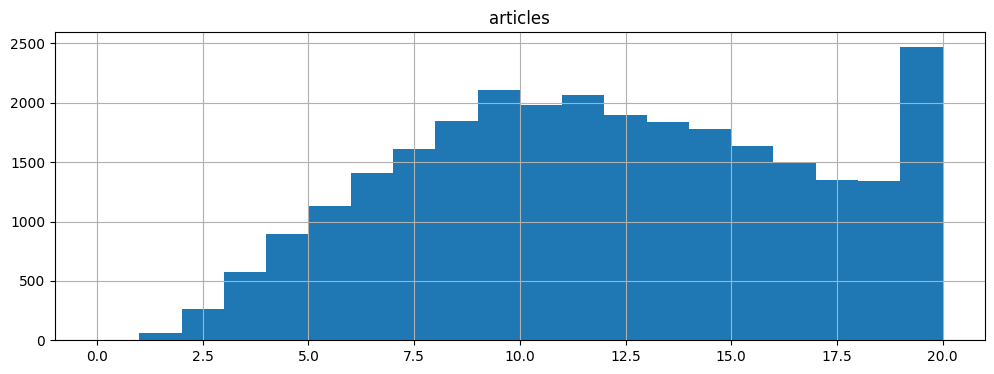

In [275]:
tweet_word_count = [len(sentence.split()) for sentence in filterTweets.body]
tweet_word_count[:10]

# Analyze the distribution of sequences by looking at the length of the texts
pd.DataFrame({'articles': tweet_word_count}).hist(
    bins=20, figsize=(12, 4), range=[0, 20]
)
plt.show()

In [276]:
tokenizer = Tokenizer(num_words=2500, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequence = tokenizer.texts_to_sequences(X_test)

pad_train = pad_sequences(train_sequences)
T = pad_train.shape[1]
pad_test = pad_sequences(test_sequence,T)

# Define the model architecture
model_vec = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (T,)),
    tf.keras.layers.Embedding(input_dim=len(word_index) + 1, output_dim=100, input_length=10, trainable=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation="softmax")
])

# Compile the model_vec
model_vec.compile(loss=loss, optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_polarity_vec.h5", save_best_only=True)

# Train the model_vec
history_subjectivity_tokenizer = model_vec.fit(pad_train, y_train, epochs=10, batch_size=16, validation_data=(pad_test, y_test), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_vec on the test set
model_vec.load_weights("model_polarity_vec.h5")
test_loss, test_acc = model_vec.evaluate(pad_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()
y_pred = model_vec.predict(pad_test)
end_time = time.time()
y_pred = (y_pred >= 0.5).astype(int)
time_taken =  end_time - start_time
metric_report( y_test,y_pred,time_taken,len( y_test))

Epoch 1/10
2082/2082 [==============================] - 131s 61ms/step - loss: 0.4721 - accuracy: 0.8210 - val_loss: 0.1870 - val_accuracy: 0.9534
Epoch 2/10
2082/2082 [==============================] - 127s 61ms/step - loss: 0.2642 - accuracy: 0.9198 - val_loss: 0.1744 - val_accuracy: 0.9595
Epoch 3/10
2082/2082 [==============================] - 123s 59ms/step - loss: 0.2306 - accuracy: 0.9270 - val_loss: 0.1679 - val_accuracy: 0.9575
Epoch 4/10
2082/2082 [==============================] - 125s 60ms/step - loss: 0.1986 - accuracy: 0.9343 - val_loss: 0.1721 - val_accuracy: 0.9622
Epoch 5/10
2082/2082 [==============================] - 125s 60ms/step - loss: 0.1661 - accuracy: 0.9454 - val_loss: 0.1919 - val_accuracy: 0.9601
Epoch 6/10
2082/2082 [==============================] - 125s 60ms/step - loss: 0.1438 - accuracy: 0.9502 - val_loss: 0.2132 - val_accuracy: 0.9594
Epoch 7/10
2082/2082 [==============================] - 125s 60ms/step - loss: 0.1247 - accuracy: 0.9549 - val_loss: 0

In [277]:
# Tokenise words by splittign them up.
tokenizer = Tokenizer(num_words=2500, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_lemma)
# Creates a dictionary of each word.
word_index = tokenizer.word_index
#Transforms each text into a sequence of interger from the word_index dictionary
train_sequences = tokenizer.texts_to_sequences(X_train_lemma)
test_sequence = tokenizer.texts_to_sequences(X_test_lemma)

# Pad the train sequence and make sure that the test sequence are of same length
pad_train = pad_sequences(train_sequences)
T = pad_train.shape[1]
pad_test = pad_sequences(test_sequence,T)

# Define the model_lemma_vec architecture
model_lemma_vec = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (T,)),
    tf.keras.layers.Embedding(input_dim=len(word_index) + 1, output_dim=100, input_length=10, trainable=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation="softmax") #Inclusive of Positive/Negative/Neutral -> May need to remove neutral from dataset.
])

# Compile the model_lemma_vec
model_lemma_vec.compile(loss=loss, optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_polarity_lemma_vec.h5", save_best_only=True)

# Train the model_lemma_vec
history_subjectivity_tokenizer_lemma = model_lemma_vec.fit(pad_train, y_train_lemma, epochs=10, batch_size=16, validation_data=(pad_test, y_test_lemma), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_lemma_vec on the test set
model_lemma_vec.load_weights("model_polarity_lemma_vec.h5")
test_loss, test_acc = model_lemma_vec.evaluate(pad_test, y_test_lemma)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()
y_pred = model_lemma_vec.predict(pad_test)
end_time = time.time()
y_pred = (y_pred >= 0.5).astype(int)
time_taken =  end_time - start_time
metric_report( y_test_lemma,y_pred,time_taken,len( y_test_lemma))

Epoch 1/10
2082/2082 [==============================] - 136s 64ms/step - loss: 0.6083 - accuracy: 0.7611 - val_loss: 0.3160 - val_accuracy: 0.9085
Epoch 2/10
2082/2082 [==============================] - 135s 65ms/step - loss: 0.3809 - accuracy: 0.8806 - val_loss: 0.3167 - val_accuracy: 0.9062
Epoch 3/10
2082/2082 [==============================] - 130s 63ms/step - loss: 0.3443 - accuracy: 0.8874 - val_loss: 0.2933 - val_accuracy: 0.9165
Epoch 4/10
2082/2082 [==============================] - 133s 64ms/step - loss: 0.3170 - accuracy: 0.8932 - val_loss: 0.2967 - val_accuracy: 0.9150
Epoch 5/10
2082/2082 [==============================] - 134s 64ms/step - loss: 0.2740 - accuracy: 0.9035 - val_loss: 0.3163 - val_accuracy: 0.9141
Epoch 6/10
2082/2082 [==============================] - 135s 65ms/step - loss: 0.2517 - accuracy: 0.9137 - val_loss: 0.3514 - val_accuracy: 0.9080
Epoch 7/10
2082/2082 [==============================] - 142s 68ms/step - loss: 0.2234 - accuracy: 0.9211 - val_loss: 0

# Enhanced Classification for Sarcasm Detection Model

Importing a Kaggle Sarcasm Headlines dataset to train our model to detect sarcasm in tweets

In [73]:
sarcasm_df = pd.read_json('Sarcasm_Headlines_Dataset_v2.json', lines = True)

In [74]:
sarcasm_df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [75]:
datasetInfo(sarcasm_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB
 Dataset Information and type 
 None
--------------------------------------------------------

 Data Types: 
is_sarcastic     int64
headline        object
article_link    object
dtype: object
--------------------------------------------------------

 Rows and Columns: 
(28619, 3)
--------------------------------------------------------

 Column Names: 
Index(['is_sarcastic', 'headline', 'article_link'], dtype='object')
--------------------------------------------------------

 Null Values: 
is_sarcastic    0.0
headline        0.0
article_link    0.0
dtype: float64
--------------------------------------------------------

 

In [77]:
sarcasm_df["is_sarcastic"].value_counts()

0    14985
1    13634
Name: is_sarcastic, dtype: int64

### Clean the Sarcasm Dataframe text

In [78]:
clean_dataframe_text(sarcasm_df,"headline",False)

,is_sarcastic,headline,article_link
0,1,thirtysometh scientist unveil doomsday clock h...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep total nail congress fall short gender ...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat veggi delici differ recip,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevent liar get work,https://local.theonion.com/inclement-weather-p...
4,1,mother come pretti close use word stream corre...,https://www.theonion.com/mother-comes-pretty-c...
...,...,...,...
28614,1,jew celebr rosh hashasha someth,https://www.theonion.com/jews-to-celebrate-ros...
28615,1,intern affair investig disappoint conspiraci d...,https://local.theonion.com/internal-affairs-in...
28616,0,beauti accept speech week came queer korean,https://www.huffingtonpost.com/entry/andrew-ah...
28617,1,mar probe destroy orbit spielbergg space palac,https://www.theonion.com/mars-probe-destroyed-...


In [128]:
X_sarcasm = sarcasm_df["headline"].values 
y_sarcasm = sarcasm_df["is_sarcastic"].values
X_train_sarcasm, X_test_sarcasm, y_train_sarcasm, y_test_sarcasm = train_test_split(
    X_sarcasm, y_sarcasm, test_size=0.20, random_state=42)

In [129]:
# create tokenizer
tokenizer = Tokenizer()

# fit tokenizer on the training data
tokenizer.fit_on_texts(X_train_sarcasm)

# get vocabulary size
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100

In [130]:
# get the length of the longest sequence
max_len = max(len(seq) for seq in X_train_sarcasm)

In [131]:
tokenizer = Tokenizer(num_words=2500, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_sarcasm)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(X_train_sarcasm)
test_sequence = tokenizer.texts_to_sequences(X_test_sarcasm)

pad_train = pad_sequences(train_sequences)
T = pad_train.shape[1]
pad_test = pad_sequences(test_sequence,T)

# Define the model architecture
model_sarcasm = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (T,)),
    tf.keras.layers.Embedding(input_dim=len(word_index) + 1, output_dim=100, input_length=10, trainable=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model_sarcasm
model_sarcasm.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_sarcasm.h5", save_best_only=True)

# Train the model_sarcasm
history_sarcasm = model_sarcasm.fit(pad_train, y_train_sarcasm, epochs=10, batch_size=32, validation_data=(pad_test, y_test_sarcasm), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_sarcasm on the test set
model_sarcasm.load_weights("model_sarcasm.h5")
test_loss, test_acc = model_sarcasm.evaluate(pad_test, y_test_sarcasm)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()
y_pred = model_sarcasm.predict(pad_test)
end_time = time.time()
y_pred = (y_pred >= 0.5).astype(int)
time_taken =  end_time - start_time
metric_report(y_test_sarcasm,y_pred,time_taken,len(y_test_sarcasm))

Epoch 1/10
716/716 [==============================] - 50s 65ms/step - loss: 0.5380 - accuracy: 0.7237 - val_loss: 0.4671 - val_accuracy: 0.7718
Epoch 2/10
716/716 [==============================] - 35s 49ms/step - loss: 0.4157 - accuracy: 0.8091 - val_loss: 0.4515 - val_accuracy: 0.7870
Epoch 3/10
716/716 [==============================] - 35s 49ms/step - loss: 0.3663 - accuracy: 0.8349 - val_loss: 0.4766 - val_accuracy: 0.7841
Epoch 4/10
716/716 [==============================] - 35s 49ms/step - loss: 0.3245 - accuracy: 0.8538 - val_loss: 0.4947 - val_accuracy: 0.7818
Epoch 5/10
716/716 [==============================] - 35s 49ms/step - loss: 0.2790 - accuracy: 0.8730 - val_loss: 0.5236 - val_accuracy: 0.7752
Epoch 6/10
716/716 [==============================] - 35s 49ms/step - loss: 0.2352 - accuracy: 0.8926 - val_loss: 0.5903 - val_accuracy: 0.7753
Epoch 7/10
716/716 [==============================] - 36s 50ms/step - loss: 0.1919 - accuracy: 0.9124 - val_loss: 0.7708 - val_accuracy:

In [ ]:
vectoriser = TfidfVectorizer()
X_train_sarcasm_tfidf = vectoriser.fit_transform(X_train_sarcasm).toarray()
X_test_sarcasm_tfidf = vectoriser.transform(X_test_sarcasm).toarray()

pad_train = pad_sequences(X_train_sarcasm_tfidf)
T = pad_train.shape[1]
pad_test = pad_sequences(X_test_sarcasm_tfidf,T)

# Define the model architecture
model_sarcasm_tfidf = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (T,)),
    tf.keras.layers.Embedding(input_dim=T, output_dim=100, input_length=10, trainable=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model_sarcasm_tfidf
model_sarcasm_tfidf.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model_sarcasm_tfidf.h5", save_best_only=True)

# Train the model_sarcasm_tfidf
history_sarcasm_tfidf = model_sarcasm_tfidf.fit(pad_train, y_train_sarcasm, epochs=10, batch_size=32, validation_data=(pad_test, y_test_sarcasm), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model_sarcasm_tfidf on the test set
model_sarcasm_tfidf.load_weights("model_sarcasm_tfidf.h5")
test_loss, test_acc = model_sarcasm_tfidf.evaluate(pad_test, y_test_sarcasm)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

start_time = time.time()
y_pred = model_sarcasm_tfidf.predict(pad_test)
end_time = time.time()
y_pred = (y_pred >= 0.5).astype(int)
time_taken =  end_time - start_time
metric_report(y_test_sarcasm,y_pred,time_taken,len(y_test_sarcasm))